# SECTION 1 - UPLOADING AND CLEANING THE DATASET

In [1]:
# IMPORTING PACKAGES

# pandas, numpy and scipy

import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pylab
from pylab import xticks

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
# UPLOADING AND DESCRIBING THE DATASET

df = pd.read_stata('C:/Users/Boris/Desktop/dataset.dta')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Columns: 310 entries, ID to KX
dtypes: float64(76), int16(2), int8(171), object(61)
memory usage: 176.1+ KB


In [3]:
df.describe()

ID           C        S1Q2        S1Q3        S1Q4       S1Q5a  \
count  141.000000  141.000000  137.000000  141.000000  140.000000  140.000000   
mean    71.000000    0.475177   23.591241  177.787234    3.985714    1.907143   
std     40.847277    0.501164    2.729347   10.241239    1.169060    0.904795   
min      1.000000    0.000000   19.000000  155.000000    1.000000    0.000000   
25%     36.000000    0.000000   22.000000  170.000000    3.000000    1.000000   
50%     71.000000    0.000000   23.000000  178.000000    4.000000    2.000000   
75%    106.000000    1.000000   25.000000  186.000000    5.000000    3.000000   
max    141.000000    1.000000   32.000000  202.000000    8.000000    4.000000   

            S1Q5b  S1Q6Single  S1Q6Inarelationship  S1Q6Engaged     ...      \
count  140.000000  141.000000           141.000000   141.000000     ...       
mean     2.071429    0.397163             0.503546     0.042553     ...       
std      0.971855    0.491055             0.501770     0.202567     ...       
min      0.000000    0.000000             0.000000     0.000000     ...       
25%      1.000000    0.000000             0.000000     0.000000     ...       
50%      2.000000    0.000000             1.000000     0.000000     ...       
75%      3.000000    1.000000             1.000000     0.000000     ...       
max      5.000000    1.000000             1.000000     1.000000     ...       

       Round9sendtoSerb  Round9sendtoBosniak  Round9expectfromSerb  \
count        141.000000           141.000000            141.000000   
mean           1.375887             1.134752              1.510638   
std            2.173013             1.867848              2.424921   
min            0.000000             0.000000              0.000000   
25%            0.000000             0.000000              0.000000   
50%            0.000000             0.000000              0.000000   
75%            2.000000             2.000000              2.000000   
max           10.000000            10.000000             10.000000   

       Round9expectfromBosniak  Round9keep   KR   KS  PayoutCompetitiveness  \
count               141.000000  141.000000  0.0  0.0             141.000000   
mean                  1.312057    8.744681  NaN  NaN              21.453901   
std                   2.197839    2.050799  NaN  NaN               7.603078   
min                   0.000000    0.000000  NaN  NaN              10.000000   
25%                   0.000000    8.000000  NaN  NaN              15.000000   
50%                   0.000000   10.000000  NaN  NaN              22.000000   
75%                   2.000000   10.000000  NaN  NaN              26.000000   
max                  10.000000   10.000000  NaN  NaN              46.000000   

       PayoutDictator    PayoutKM  
count      141.000000  141.000000  
mean         8.744681   30.198582  
std          2.050799    8.072192  
min          0.000000   10.000000  
25%          8.000000   24.000000  
50%         10.000000   31.000000  
75%         10.000000   36.000000  
max         10.000000   56.000000  

[8 rows x 249 columns]

In [4]:
# COUNTING MISSING VALUES

df.isnull().sum().sum()

730L

In [5]:
# EXPLORING NUMBER OF MISSING VALUES IN EACH COLUMN

pd.set_option('display.height', 500)

df.isnull().sum()

height has been deprecated.



ID                              0
S1Q1                            0
C                               0
S1Q2                            4
S1Q3                            0
S1Q4                            1
S1Q5a                           1
S1Q5b                           1
S1Q6                            0
S1Q6Single                      0
S1Q6Inarelationship             0
S1Q6Engaged                     0
S1Q6Married                     0
S1Q6Other                       0
S1Q7                            0
S1Q7Highschool                  0
S1Q7CollegeUniversity           0
S1Q7Master                      0
S1Q8                            0
S1Q8Fulltime                    1
S1Q8Parttime                    1
S1Q8Unemployed                  1
S1Q8Other                       1
S1Q9                            0
S1Q9Father                      1
S1Q9Mother                      1
S1Q9Grandfather                 1
S1Q9Grandmother                 1
S1Q9Brother                     1
S1Q9Sister    

In [6]:
# taking a look at columns with more than 5 missing values

print df.S1Q13
print df.S4Q7
print df.S4Q10

"""These are all  variables with some big outliers, so instead of replacing missing values with average value, 
I will replace it with median.
Other way to do it would be first to get rid of outliers and then to replace missing values with mean.
But S4Q7 and S4Q10 are not relevant variables, so this is not too concerning"""

0       2500.0
1       1200.0
2        500.0
3        900.0
4        400.0
5        800.0
6        650.0
7        500.0
8          0.0
9        450.0
10         NaN
11         NaN
12      1000.0
13      2000.0
14      2000.0
15       900.0
16       600.0
17      3000.0
18      1500.0
19       600.0
20      1550.0
21       500.0
22      1300.0
23       400.0
24      1500.0
25       400.0
26      2000.0
27      1000.0
28       900.0
29      1200.0
30      2000.0
31       170.0
32      1000.0
33       550.0
34      1600.0
35      1000.0
36      1500.0
37      1200.0
38         NaN
39         NaN
40       360.0
41       500.0
42         NaN
43      2500.0
44       750.0
45       750.0
46      1600.0
47      1200.0
48       500.0
49       700.0
50      1000.0
51       900.0
52       700.0
53      1300.0
54       600.0
55       700.0
56         NaN
57      1000.0
58      1000.0
59       900.0
60       900.0
61       710.0
62       200.0
63       300.0
64       800.0
65       950.0
66       8

'These are all  variables with some big outliers, so instead of replacing missing values with average value, \nI will replace it with median.\nOther way to do it would be first to get rid of outliers and then to replace missing values with mean.\nBut S4Q7 and S4Q10 are not relevant variables, so this is not too concerning'

In [7]:
# DROPING THE COLUMNS AND ROWS WITH ALL MISSING VALUES

# columns

df.dropna(axis=1, how='all', inplace=True)

# rows

df.dropna(axis=0, how='all', inplace=True)



df.isnull().sum().sum()

"""THIS IS SIMPLY DROPPING THE COLUMNS AND ROWS THAT CONTAIN ALL MISSING VALUES. 
THESE COLUMNS AND ROWS WERE PROBABLY CREATED SOMEHOW DURING CONVERSION AND IMPORTING PROCESS.
AFTER DROPPING THESE COLUMNS, WE ARE LEFT WITH 166 MISSING VALUES"""

'THIS IS SIMPLY DROPPING THE COLUMNS AND ROWS THAT CONTAIN ALL MISSING VALUES. \nTHESE COLUMNS AND ROWS WERE PROBABLY CREATED SOMEHOW DURING CONVERSION AND IMPORTING PROCESS.\nAFTER DROPPING THESE COLUMNS, WE ARE LEFT WITH 166 MISSING VALUES'

In [8]:
# REPLACING MISSING INCOME VALUES WITH MEDIAN

df.S1Q13.fillna(df.S1Q13.median(), inplace=True)
df.S4Q7.fillna(df.S4Q7.median(), inplace=True)
df.S4Q10.fillna(df.S4Q10.median(), inplace=True)

# REPLACING ALL OTHER MISSING VALUES WITH MEAN

df.fillna(df.mean(), inplace=True)


df.isnull().sum().sum()

"""FIRST I REPLACED MISSING VALUES OF PREVIOUSLY MENTIONED COLUMNS WITH THEIR MEDIAN.
AFTER THAT, FOR ALL OTHER COLUMNS, I REPLACED MISSING VALUES WITH MEAN.
NOW, WHEN WE COUNT MISSING VALUES, WE CAN SEE THERE IS ZERO MISSING VALUES"""

'FIRST I REPLACED MISSING VALUES OF PREVIOUSLY MENTIONED COLUMNS WITH THEIR MEDIAN.\nAFTER THAT, FOR ALL OTHER COLUMNS, I REPLACED MISSING VALUES WITH MEAN.\nNOW, WHEN WE COUNT MISSING VALUES, WE CAN SEE THERE IS ZERO MISSING VALUES'

In [9]:
pd.set_option('display.max_columns', 500)
df

ID S1Q1  C       S1Q2  S1Q3      S1Q4     S1Q5a     S1Q5b  \
0      1    F  1  26.000000   168  4.000000  2.000000  2.000000   
1      2    M  0  26.000000   198  4.000000  2.000000  2.000000   
2      3    M  0  27.000000   188  4.000000  2.000000  2.000000   
3      4    F  1  22.000000   160  6.000000  3.000000  3.000000   
4      5    F  1  23.000000   165  3.000000  1.000000  2.000000   
5      6    M  0  26.000000   186  5.000000  2.000000  3.000000   
6      7    M  0  23.000000   181  4.000000  3.000000  1.000000   
7      8    M  0  22.000000   183  3.000000  1.000000  2.000000   
8      9    F  1  21.000000   175  5.000000  1.000000  4.000000   
9     10    M  0  22.000000   192  6.000000  3.000000  3.000000   
10    11    M  0  21.000000   181  4.000000  3.000000  1.000000   
11    12    M  0  27.000000   178  5.000000  3.000000  2.000000   
12    13    F  1  25.000000   159  3.000000  1.000000  1.000000   
13    14    M  0  22.000000   195  4.000000  2.000000  2.000000   
14    15    M  0  22.000000   180  6.000000  3.000000  3.000000   
15    16    F  1  28.000000   187  5.000000  1.000000  4.000000   
16    17    F  1  21.000000   168  2.000000  0.000000  2.000000   
17    18    F  1  22.000000   170  4.000000  1.000000  3.000000   
18    19    M  0  23.000000   187  6.000000  3.000000  3.000000   
19    20    F  1  21.000000   160  4.000000  2.000000  2.000000   
20    21    M  0  23.000000   187  3.000000  2.000000  1.000000   
21    22    F  1  32.000000   168  3.000000  0.000000  3.000000   
22    23    F  1  24.000000   177  4.000000  2.000000  2.000000   
23    24    F  1  25.000000   172  4.000000  2.000000  2.000000   
24    25    F  1  21.000000   173  3.000000  1.000000  2.000000   
25    26    M  0  23.000000   175  6.000000  4.000000  2.000000   
26    27    F  1  22.000000   167  4.000000  1.000000  3.000000   
27    28    F  1  29.000000   169  4.000000  2.000000  2.000000   
28    29    F  1  30.000000   165  5.000000  2.000000  3.000000   
29    30    F  1  21.000000   174  4.000000  1.000000  3.000000   
30    31    M  0  25.000000   188  4.000000  3.000000  1.000000   
31    32    M  0  22.000000   177  3.000000  1.000000  2.000000   
32    33    M  0  26.000000   189  4.000000  2.000000  2.000000   
33    34    F  1  23.000000   171  4.000000  2.000000  2.000000   
34    35    M  0  25.000000   190  2.000000  2.000000  0.000000   
35    36    M  0  26.000000   192  2.000000  1.000000  1.000000   
36    37    M  0  23.591241   192  4.000000  3.000000  1.000000   
37    38    F  1  24.000000   179  5.000000  2.000000  3.000000   
38    39    F  1  19.000000   164  5.000000  1.000000  4.000000   
39    40    F  1  23.000000   158  5.000000  1.000000  4.000000   
40    41    F  1  26.000000   173  4.000000  2.000000  2.000000   
41    42    F  1  22.000000   160  4.000000  1.000000  3.000000   
42    43    F  1  25.000000   170  2.000000  1.000000  1.000000   
43    44    M  0  21.000000   183  5.000000  2.000000  3.000000   
44    45    M  0  22.000000   186  5.000000  3.000000  2.000000   
45    46    F  1  28.000000   160  1.000000  0.000000  1.000000   
46    47    F  1  24.000000   161  4.000000  2.000000  2.000000   
47    48    F  1  23.000000   167  4.000000  2.000000  2.000000   
48    49    F  1  22.000000   175  5.000000  3.000000  2.000000   
49    50    F  1  22.000000   165  5.000000  2.000000  3.000000   
50    51    F  1  23.000000   164  5.000000  1.000000  4.000000   
51    52    F  1  22.000000   167  4.000000  2.000000  2.000000   
52    53    F  1  21.000000   172  4.000000  2.000000  2.000000   
53    54    M  0  26.000000   185  4.000000  2.000000  2.000000   
54    55    F  1  29.000000   173  2.000000  1.000000  1.000000   
55    56    M  0  26.000000   174  3.000000  2.000000  1.000000   
56    57    F  1  21.000000   170  4.000000  1.000000  3.000000   
57    58    F  1  26.000000   163  3.000000  1.000000  2.000000   
58    59    F  1  22.000000   169  7.000000  4.000000

In [10]:
# MAKING A NEW DATAFRAME THAT CONTAINS ONLY MEANINGFUL COLUMNS

df1 = df[['S1Q1', 'S1Q2', 'S1Q3', 'S1Q4', 'S1Q5a', 'S1Q5b', 'S1Q6','S1Q7', 'S1Q8', 'S1Q9', 'S1Q10', 'S1Q11', 'S1Q12', 'S1Q13', 'S1Q14', 'S1Q15', 'S1Q16',
       'S2Q1', 'S2Q2a', 'S2Q2b', 'S2Q5', 
       'S3Q1', 'S3Q2', 'S3Q3', 'S3Q4', 'S3Q5', 'S3Q6', 'S3Q7', 'S3Q8', 'S3Q9', 'S3Q10', 'S3Q11', 'S3Q12', 'S3Q13', 'S3Q14', 'S3Q15', 'S3Q16', 'S3Q17', 'S3Q18', 'S3Q19',
      'S4Q1', 'S4Q2', 'S4Q3', 'S4Q4', 'S4Q5', 'S4Q6', 'S4Q7', 'S4Q8', 'S4Q9', 'S4Q10', 'S4Q11', 'S4Q12', 'S4Q13', 'S4Q14', 'S4Q15', 'S4Q16', 'S4Q17', 'S4Q18', 'S4Q19', 
       'S5Q1', 'S5Q2', 'S5Q3', 'S5Q4', 'S5Q5', 'S5Q6', 'S5Q7', 'S5Q8', 'S5Q9', 'S5Q10', 'S5Q11', 'Round1numberofanswers', 'Round2numberofanswers', 'Round3numberofanswers', 'Round3choicecashport','Round4numberofanswers', 'Round4choiceneutralvoucher', 'Round5numberofanswers', 'Round5choicegenderspecific', 'Guessinggame', 'Round6riskswitchingpoint', 'Round7wtpneutralswitchin', 'Round8wtpgenderspecifics', 'Round9sendtoSerb', 'Round9sendtoBosniak', 'Round9expectfromSerb', 'Round9expectfromBosniak',]]
df1

S1Q1       S1Q2  S1Q3      S1Q4     S1Q5a     S1Q5b               S1Q6  \
0      F  26.000000   168  4.000000  2.000000  2.000000            Engaged   
1      M  26.000000   198  4.000000  2.000000  2.000000  In a relationship   
2      M  27.000000   188  4.000000  2.000000  2.000000             Single   
3      F  22.000000   160  6.000000  3.000000  3.000000             Single   
4      F  23.000000   165  3.000000  1.000000  2.000000  In a relationship   
5      M  26.000000   186  5.000000  2.000000  3.000000            Engaged   
6      M  23.000000   181  4.000000  3.000000  1.000000  In a relationship   
7      M  22.000000   183  3.000000  1.000000  2.000000             Single   
8      F  21.000000   175  5.000000  1.000000  4.000000             Single   
9      M  22.000000   192  6.000000  3.000000  3.000000             Single   
10     M  21.000000   181  4.000000  3.000000  1.000000  In a relationship   
11     M  27.000000   178  5.000000  3.000000  2.000000             Single   
12     F  25.000000   159  3.000000  1.000000  1.000000             Single   
13     M  22.000000   195  4.000000  2.000000  2.000000             Single   
14     M  22.000000   180  6.000000  3.000000  3.000000             Single   
15     F  28.000000   187  5.000000  1.000000  4.000000              Other   
16     F  21.000000   168  2.000000  0.000000  2.000000  In a relationship   
17     F  22.000000   170  4.000000  1.000000  3.000000             Single   
18     M  23.000000   187  6.000000  3.000000  3.000000  In a relationship   
19     F  21.000000   160  4.000000  2.000000  2.000000             Single   
20     M  23.000000   187  3.000000  2.000000  1.000000  In a relationship   
21     F  32.000000   168  3.000000  0.000000  3.000000  In a relationship   
22     F  24.000000   177  4.000000  2.000000  2.000000  In a relationship   
23     F  25.000000   172  4.000000  2.000000  2.000000  In a relationship   
24     F  21.000000   173  3.000000  1.000000  2.000000  In a relationship   
25     M  23.000000   175  6.000000  4.000000  2.000000  In a relationship   
26     F  22.000000   167  4.000000  1.000000  3.000000             Single   
27     F  29.000000   169  4.000000  2.000000  2.000000             Single   
28     F  30.000000   165  5.000000  2.000000  3.000000  In a relationship   
29     F  21.000000   174  4.000000  1.000000  3.000000  In a relationship   
30     M  25.000000   188  4.000000  3.000000  1.000000              Other   
31     M  22.000000   177  3.000000  1.000000  2.000000  In a relationship   
32     M  26.000000   189  4.000000  2.000000  2.000000  In a relationship   
33     F  23.000000   171  4.000000  2.000000  2.000000  In a relationship   
34     M  25.000000   190  2.000000  2.000000  0.000000  In a relationship   
35     M  26.000000   192  2.000000  1.000000  1.000000             Single   
36     M  23.591241   192  4.000000  3.000000  1.000000  In a relationship   
37     F  24.000000   179  5.000000  2.000000  3.000000  In a relationship   
38     F  19.000000   164  5.000000  1.000000  4.000000             Single   
39     F  23.000000   158  5.000000  1.000000  4.000000             Single   
40     F  26.000000   173  4.000000  2.000000  2.000000  In a relationship   
41     F  22.000000   160  4.000000  1.000000  3.000000  In a relationship   
42     F  25.000000   170  2.000000  1.000000  1.000000  In a relationship   
43     M  21.000000   183  5.000000  2.000000  3.000000  In a relationship   
44     M  22.000000   186  5.000000  3.000000  2.000000  In a relationship   
45     F  28.000000   160  1.000000  0.000000  1.000000             Single   
46     F  24.000000   161  4.000000  2.000000  2.000000             Single   
47     F  23.000000   167  4.000000  2.000000  2.000000  In a relationship   
48     F  22.000000   175  5.000000  3.000000  2.000000  In a relationship   
49     F  22.000000   165  5.000000  2.000000  3.000000             Single   
50     F  23.000000   164 

In [11]:
# RENAMING THE COLUMNS

df1.rename(columns={
    'S1Q1':'gender',
    'S1Q2':'age',
    'S1Q3':'height',
    'S1Q4':'hh_members',
    'S1Q5a':'male_hh_members', 
    'S1Q5b':'female_hh_members', 
    'S1Q6':'marital_status', 
    'S1Q7':'education', 
    'S1Q8':'working_status', 
    'S1Q9':'hh_head', 
    'S1Q10':'hh_head_gender', 
    'S1Q11':'hh_head_education', 
    'S1Q12':'income_own', 
    'S1Q13':'income_hh_head', 
    'S1Q14':'income_hh_total', 
    'S1Q15':'fin_decisions',
    'S1Q16':'work=sucess', 
    'S2Q1':'guess_opponent',
    'S2Q2a':'guess_male', 
    'S2Q2b':'guess_female', 
    'S2Q5':'vouchers_usefull',         
    'S4Q1':'patience', 
    'S4Q2':'now_or_wait_1.1', 
    'S4Q3':'now_or_wait_1.2', 
    'S4Q4':'wait_value_1', 
    'S4Q5':'now_or_wait_3.1', 
    'S4Q6':'now_or_wait_3.2',
    'S4Q7':'wait_value_3', 
    'S4Q8':'now_or_wait_6.1', 
    'S4Q9':'now_or_wait_6.2', 
    'S4Q10':'wait_value_6', 
    'S4Q11':'risk_gamble_1', 
    'S4Q12':'risk_gamble_2', 
    'S4Q13':'risk_gamble_3', 
    'S4Q14':'risk_general', 
    'S4Q15':'risk_driving', 
    'S4Q16':'risk_finance', 
    'S4Q17':'risk_sport', 
    'S4Q18':'risk_career', 
    'S4Q19':'risk_health',       
    'S5Q1':'Father_in_war', 
    'S5Q2':'war_importance', 
    'S5Q3':'displaced',
    'S5Q4':'close_ethnicity', 
    'S5Q5':'safe_ethnicity', 
    'S5Q6':'tito', 
    'S5Q7':'tito_parents', 
    'S5Q8':'satisified_politics',
    'S5Q9':'leaving_bosnia', 
    'S5Q10':'ethnicity', 
    'S5Q11':'ethnicity_importance',
    'Round1numberofanswers':'score_piece', 
    'Round2numberofanswers':'score_tournament', 
    'Round3numberofanswers':'score_cash', 
    'Round3choicecashport':'choice_cash',
    'Round4numberofanswers':'score_neutral', 
    'Round4choiceneutralvoucher':'choice_neutral', 
    'Round5numberofanswers':'score_specific', 
    'Round5choicegenderspecific':'choice_specific', 
    'Guessinggame':'guess', 
    'Round6riskswitchingpoint':'risk_tolerance',
    'Round7wtpneutralswitchin':'wtp_neutral', 
    'Round8wtpgenderspecifics':'wtp_specific', 
    'Round9sendtoSerb':'send_serb', 
    'Round9sendtoBosniak':'send_bosniak', 
    'Round9expectfromSerb':'expect_serb', 
    'Round9expectfromBosniak':'expect_bosniak'
        
    },inplace=True)

df1

C:\Users\Boris\Anaconda2\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


gender        age  height  hh_members  male_hh_members  female_hh_members  \
0        F  26.000000     168    4.000000         2.000000           2.000000   
1        M  26.000000     198    4.000000         2.000000           2.000000   
2        M  27.000000     188    4.000000         2.000000           2.000000   
3        F  22.000000     160    6.000000         3.000000           3.000000   
4        F  23.000000     165    3.000000         1.000000           2.000000   
5        M  26.000000     186    5.000000         2.000000           3.000000   
6        M  23.000000     181    4.000000         3.000000           1.000000   
7        M  22.000000     183    3.000000         1.000000           2.000000   
8        F  21.000000     175    5.000000         1.000000           4.000000   
9        M  22.000000     192    6.000000         3.000000           3.000000   
10       M  21.000000     181    4.000000         3.000000           1.000000   
11       M  27.000000     178    5.000000         3.000000           2.000000   
12       F  25.000000     159    3.000000         1.000000           1.000000   
13       M  22.000000     195    4.000000         2.000000           2.000000   
14       M  22.000000     180    6.000000         3.000000           3.000000   
15       F  28.000000     187    5.000000         1.000000           4.000000   
16       F  21.000000     168    2.000000         0.000000           2.000000   
17       F  22.000000     170    4.000000         1.000000           3.000000   
18       M  23.000000     187    6.000000         3.000000           3.000000   
19       F  21.000000     160    4.000000         2.000000           2.000000   
20       M  23.000000     187    3.000000         2.000000           1.000000   
21       F  32.000000     168    3.000000         0.000000           3.000000   
22       F  24.000000     177    4.000000         2.000000           2.000000   
23       F  25.000000     172    4.000000         2.000000           2.000000   
24       F  21.000000     173    3.000000         1.000000           2.000000   
25       M  23.000000     175    6.000000         4.000000           2.000000   
26       F  22.000000     167    4.000000         1.000000           3.000000   
27       F  29.000000     169    4.000000         2.000000           2.000000   
28       F  30.000000     165    5.000000         2.000000           3.000000   
29       F  21.000000     174    4.000000         1.000000           3.000000   
30       M  25.000000     188    4.000000         3.000000           1.000000   
31       M  22.000000     177    3.000000         1.000000           2.000000   
32       M  26.000000     189    4.000000         2.000000           2.000000   
33       F  23.000000     171    4.000000         2.000000           2.000000   
34       M  25.000000     190    2.000000         2.000000           0.000000   
35       M  26.000000     192    2.000000         1.000000           1.000000   
36       M  23.591241     192    4.000000         3.000000           1.000000   
37       F  24.000000     179    5.000000         2.000000           3.000000   
38       F  19.000000     164    5.000000         1.000000           4.000000   
39       F  23.000000     158    5.000000         1.000000           4.000000   
40       F  26.000000     173    4.000000         2.000000           2.000000   
41       F  22.000000     160    4.000000         1.000000           3.000000   
42       F  25.000000     170    2.000000         1.000000           1.000000   
43       M  21.000000     183    5.000000         2.000000           3.000000   
44       M  22.000000     186    5.000000         3.000000           2.000000   
45       F  28.000000     160    1.000000         0.000000           1.000000   
46       F  24.000000     161    4.000000         2.000000           2.000000   
47       F  23.000000     167    4.000000         2.000000           2.000000   
48       F  22.000000     175    5.

In [12]:
# CONVERTING ALL REMAINING FLOATS TO INTEGERS

df1.age = [int(float(x)) for x in df1.age]
df1.hh_members = [int(float(x)) for x in df1.hh_members]
df1.male_hh_members = [int(float(x)) for x in df1.male_hh_members]
df1.female_hh_members = [int(float(x)) for x in df1.female_hh_members]
df1.income_own = [int(float(x)) for x in df1.income_own]
df1.income_hh_head = [int(float(x)) for x in df1.income_hh_head]
df1.income_hh_total = [int(float(x)) for x in df1.income_hh_total]
df1.guess_opponent = [int(float(x)) for x in df1.guess_opponent]
df1.guess_male = [int(float(x)) for x in df1.guess_male]
df1.guess_female = [int(float(x)) for x in df1.guess_female]
df1.wait_value_3 = [int(float(x)) for x in df1.wait_value_3]
df1.wait_value_6 = [int(float(x)) for x in df1.wait_value_6]


C:\Users\Boris\Anaconda2\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


# SECTION 2 - OUTLIERS AND DISTRIBUTION

In [13]:
df1

gender  age  height  hh_members  male_hh_members  female_hh_members  \
0        F   26     168           4                2                  2   
1        M   26     198           4                2                  2   
2        M   27     188           4                2                  2   
3        F   22     160           6                3                  3   
4        F   23     165           3                1                  2   
5        M   26     186           5                2                  3   
6        M   23     181           4                3                  1   
7        M   22     183           3                1                  2   
8        F   21     175           5                1                  4   
9        M   22     192           6                3                  3   
10       M   21     181           4                3                  1   
11       M   27     178           5                3                  2   
12       F   25     159           3                1                  1   
13       M   22     195           4                2                  2   
14       M   22     180           6                3                  3   
15       F   28     187           5                1                  4   
16       F   21     168           2                0                  2   
17       F   22     170           4                1                  3   
18       M   23     187           6                3                  3   
19       F   21     160           4                2                  2   
20       M   23     187           3                2                  1   
21       F   32     168           3                0                  3   
22       F   24     177           4                2                  2   
23       F   25     172           4                2                  2   
24       F   21     173           3                1                  2   
25       M   23     175           6                4                  2   
26       F   22     167           4                1                  3   
27       F   29     169           4                2                  2   
28       F   30     165           5                2                  3   
29       F   21     174           4                1                  3   
30       M   25     188           4                3                  1   
31       M   22     177           3                1                  2   
32       M   26     189           4                2                  2   
33       F   23     171           4                2                  2   
34       M   25     190           2                2                  0   
35       M   26     192           2                1                  1   
36       M   23     192           4                3                  1   
37       F   24     179           5                2                  3   
38       F   19     164           5                1                  4   
39       F   23     158           5                1                  4   
40       F   26     173           4                2                  2   
41       F   22     160           4                1                  3   
42       F   25     170           2                1                  1   
43       M   21     183           5                2                  3   
44       M   22     186           5                3                  2   
45       F   28     160           1                0                  1   
46       F   24     161           4                2                  2   
47       F   23     167           4                2                  2   
48       F   22     175           5                3                  2   
49       F   22     165           5                2                  3   
50       F   23     164           5                1                  4   
51       F   22     167           4                2                  2   
52       F   21     172      

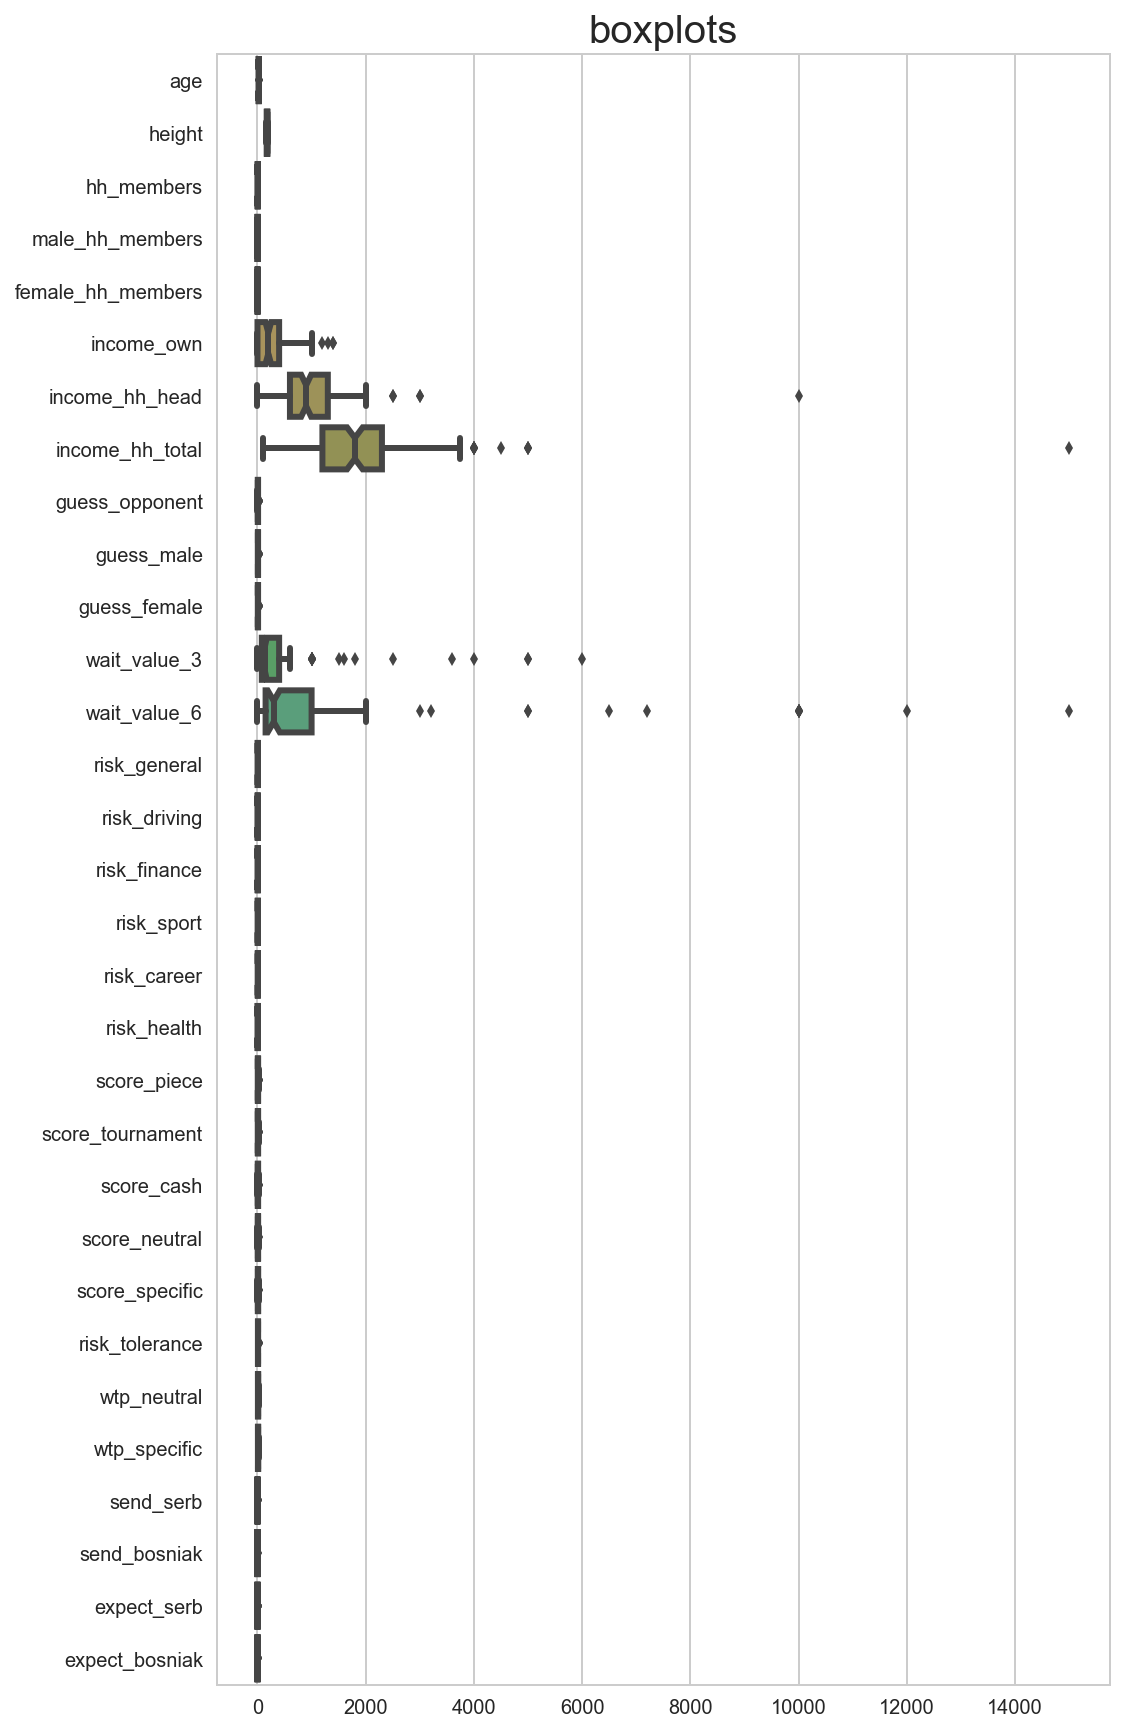

'AS WE CAN SEE, THIS GRAPH IS NOT TELLING US A LOT BECAUSE OF SCALING - SOME VARIABLES ARE\nTAKING VALUES 1-10 WHILE SOME ARE IN THOUSANDS.\nTHAT IS WHY I AM GOING TO GROUP THESE VARIABLES BY SCALING AND DO SEPARATE GRAPHS'

In [14]:
fig = plt.figure(figsize=(8,15))
ax = fig.gca()

sns.boxplot(data=df1, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_title('boxplots', fontsize=20)

plt.show()

"""AS WE CAN SEE, THIS GRAPH IS NOT TELLING US A LOT BECAUSE OF SCALING - SOME VARIABLES ARE
TAKING VALUES 1-10 WHILE SOME ARE IN THOUSANDS.
THAT IS WHY I AM GOING TO GROUP THESE VARIABLES BY SCALING AND DO SEPARATE GRAPHS"""

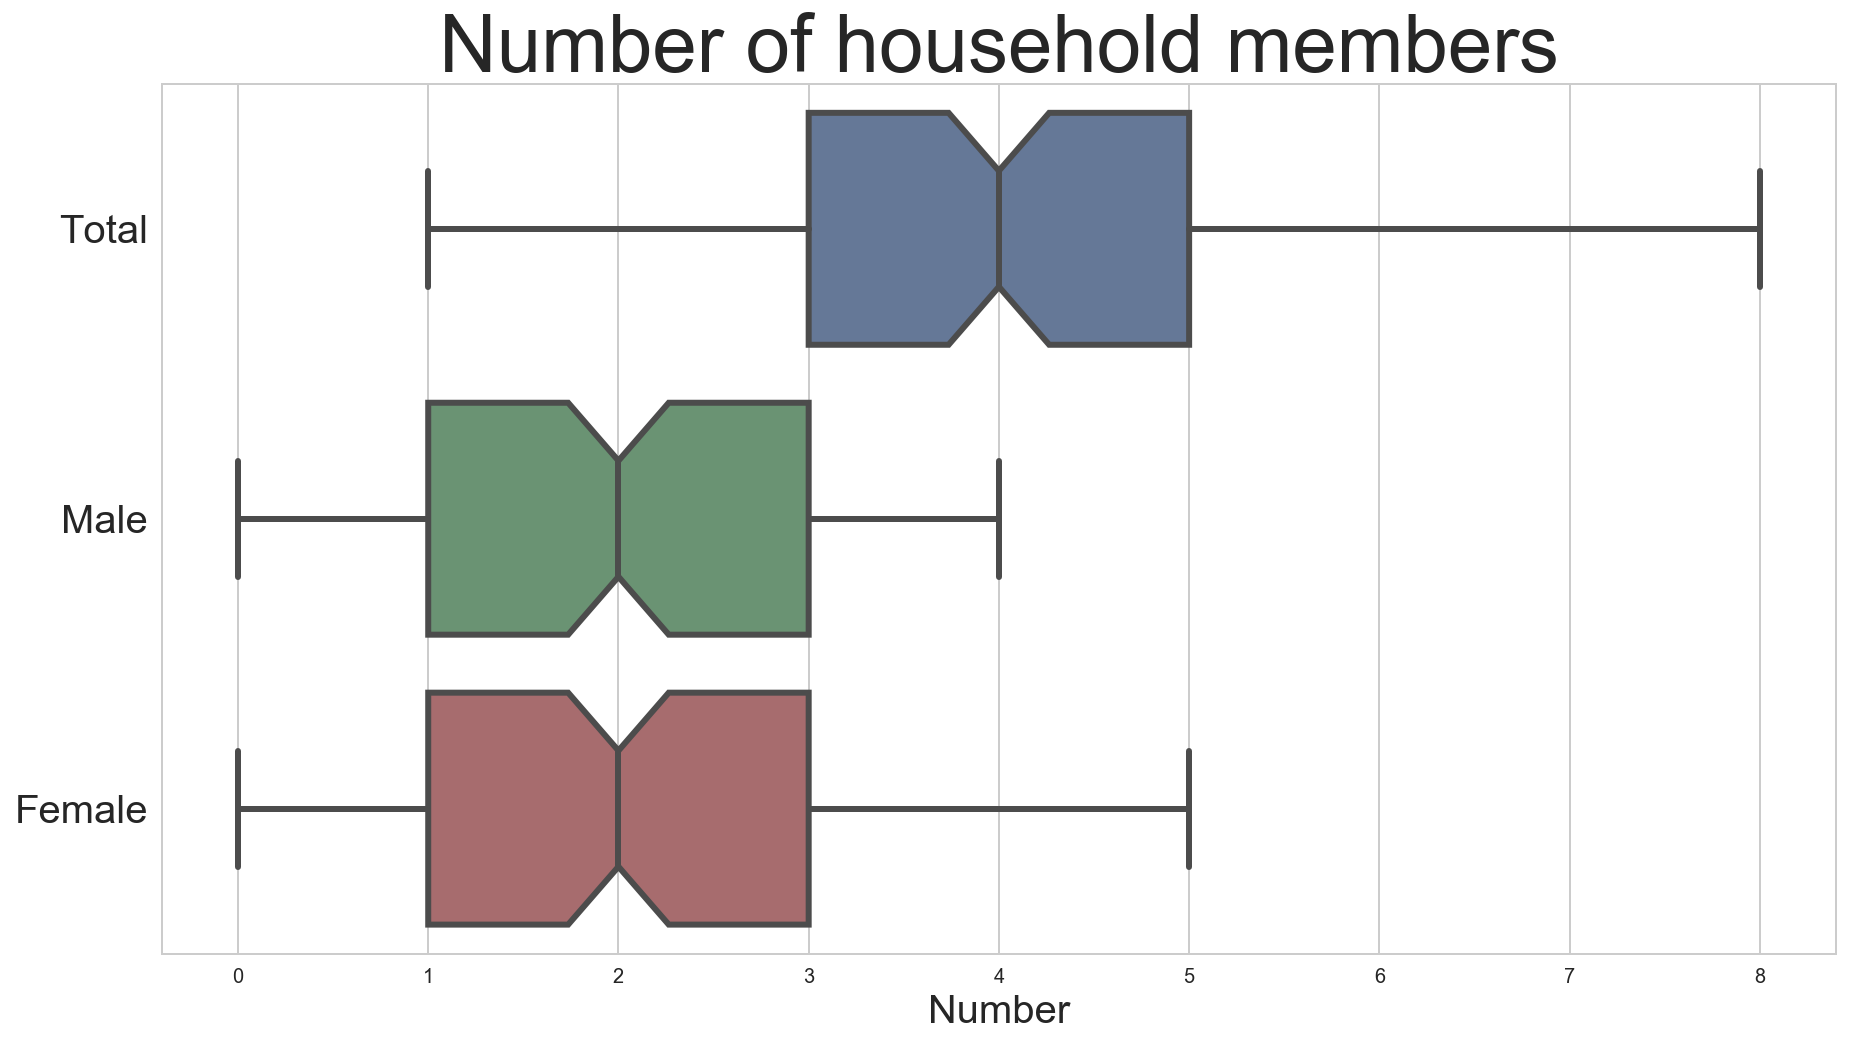

In [15]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.boxplot(data=[df1.hh_members, df1.male_hh_members, df1.female_hh_members], orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_title('Number of household members', fontsize=40)
ax.set_xlabel('Number', fontsize=20)
ax.set_yticklabels(['Total', 'Male', 'Female',], fontsize=20)

plt.show()

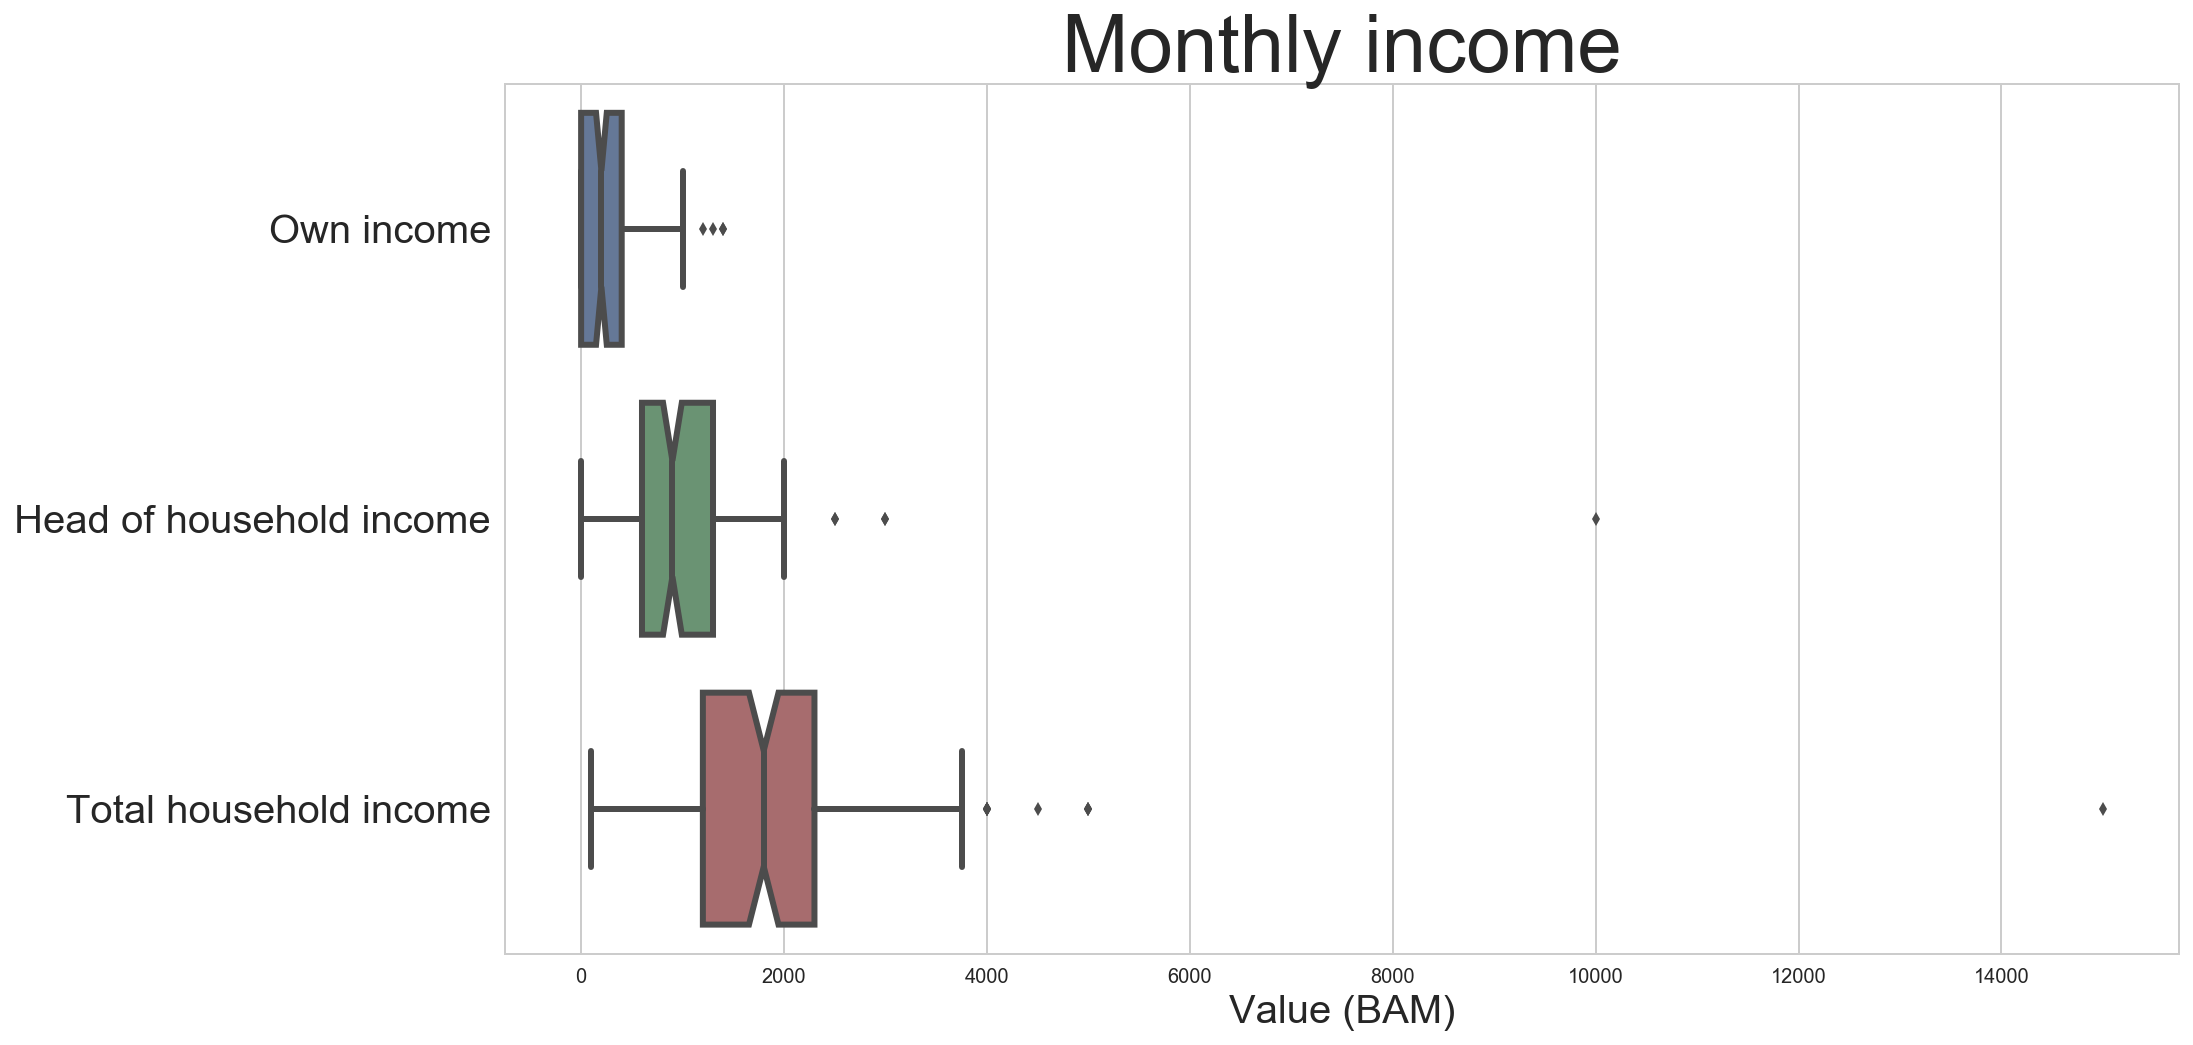

In [16]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.boxplot(data=[df1.income_own, df1.income_hh_head, df1.income_hh_total], orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_title('Monthly income', fontsize=40)
ax.set_xlabel('Value (BAM)', fontsize=20)
ax.set_yticklabels(['Own income', 'Head of household income', 'Total household income',], fontsize=20)

plt.show()

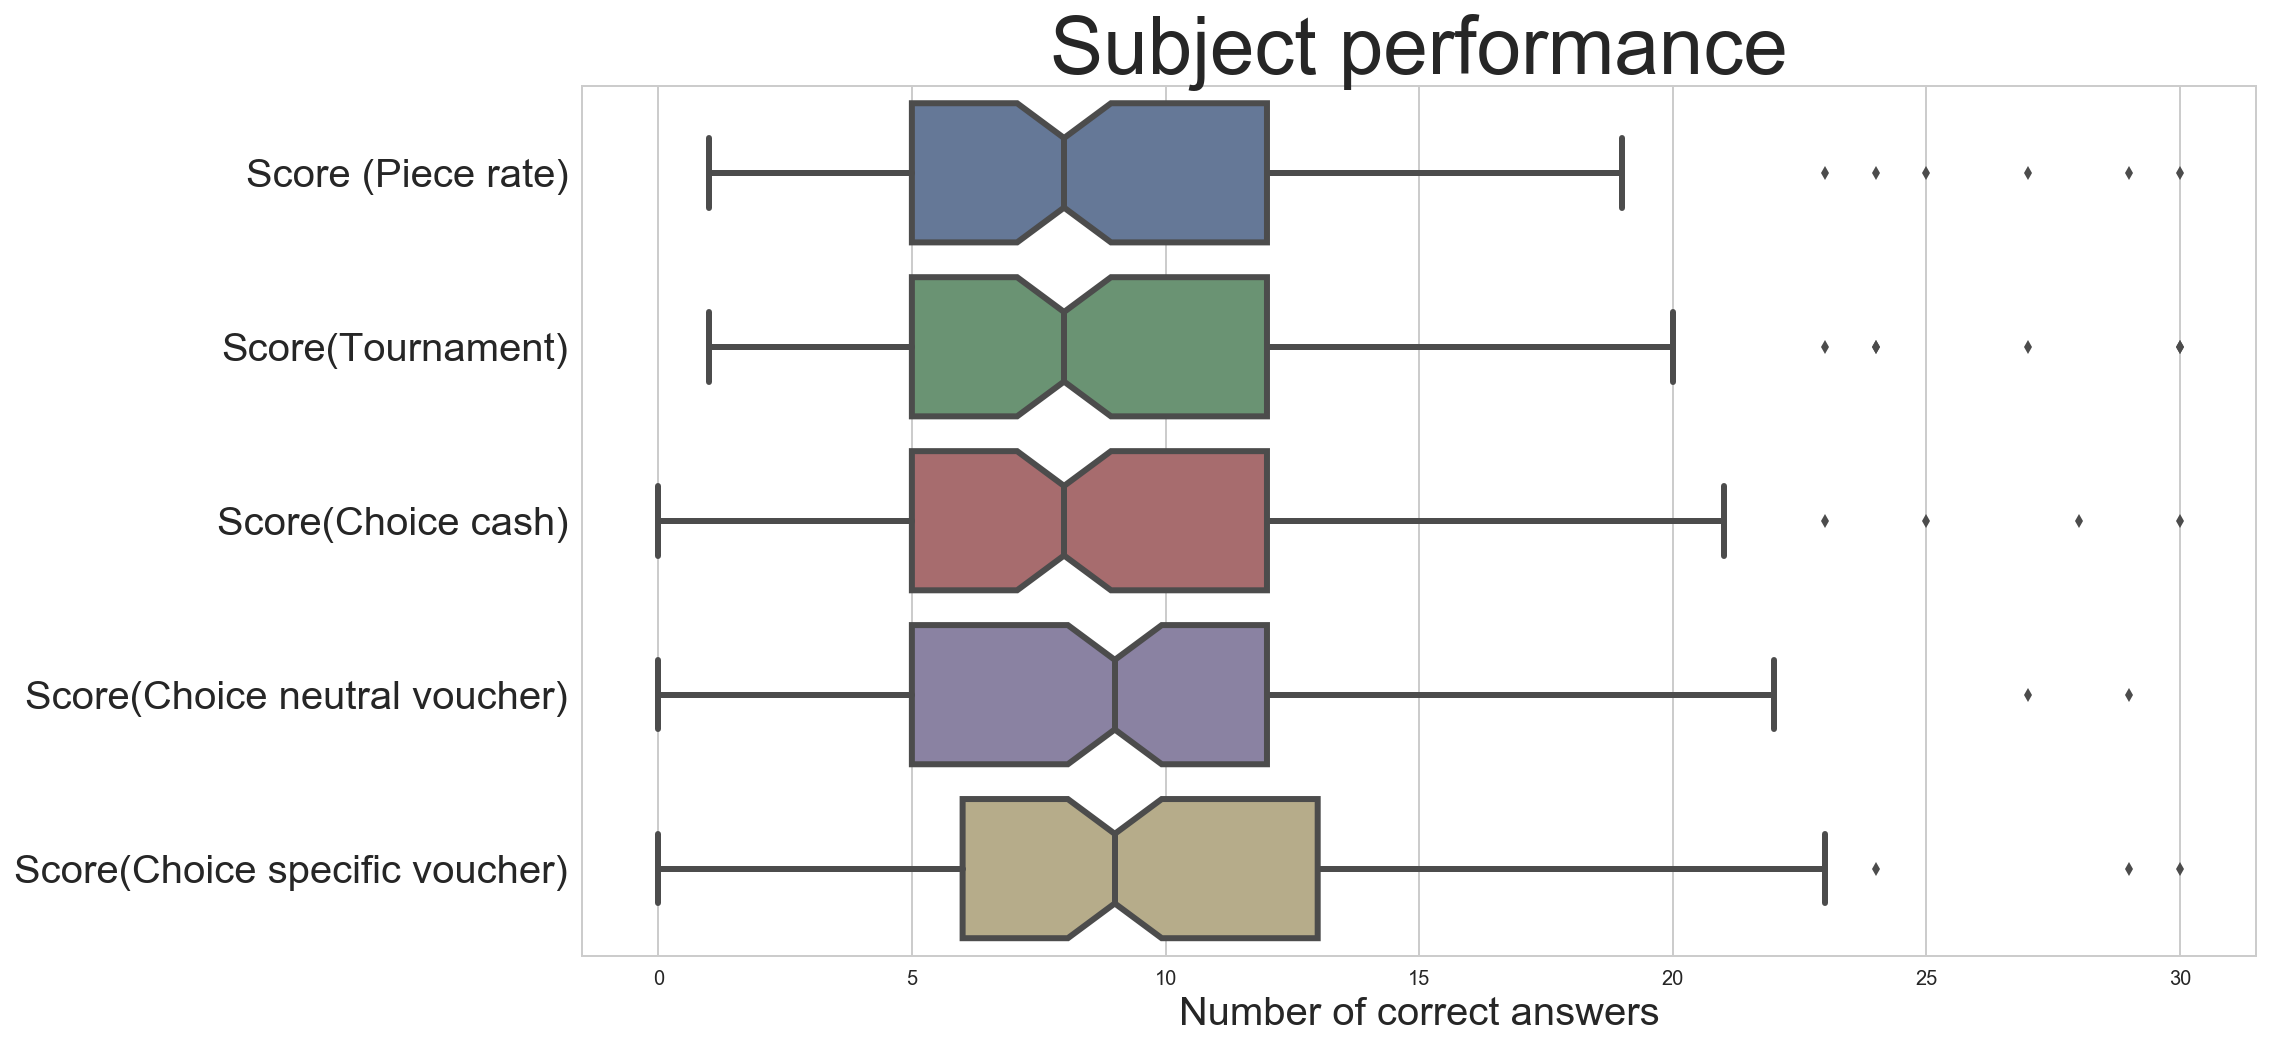

In [17]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.boxplot(data=[df1.score_piece, df1.score_tournament, df1.score_cash, df1.score_neutral, df1.score_specific], orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_title('Subject performance', fontsize=40)
ax.set_xlabel('Number of correct answers', fontsize=20)
ax.set_yticklabels(['Score (Piece rate)', 'Score(Tournament)', 'Score(Choice cash)', 'Score(Choice neutral voucher)', 'Score(Choice specific voucher)'], fontsize=20)

plt.show()

These outliers in the graph above are result of mistake in first session of experiment. In further analysis of these particular variables, those outliers will be excluded.

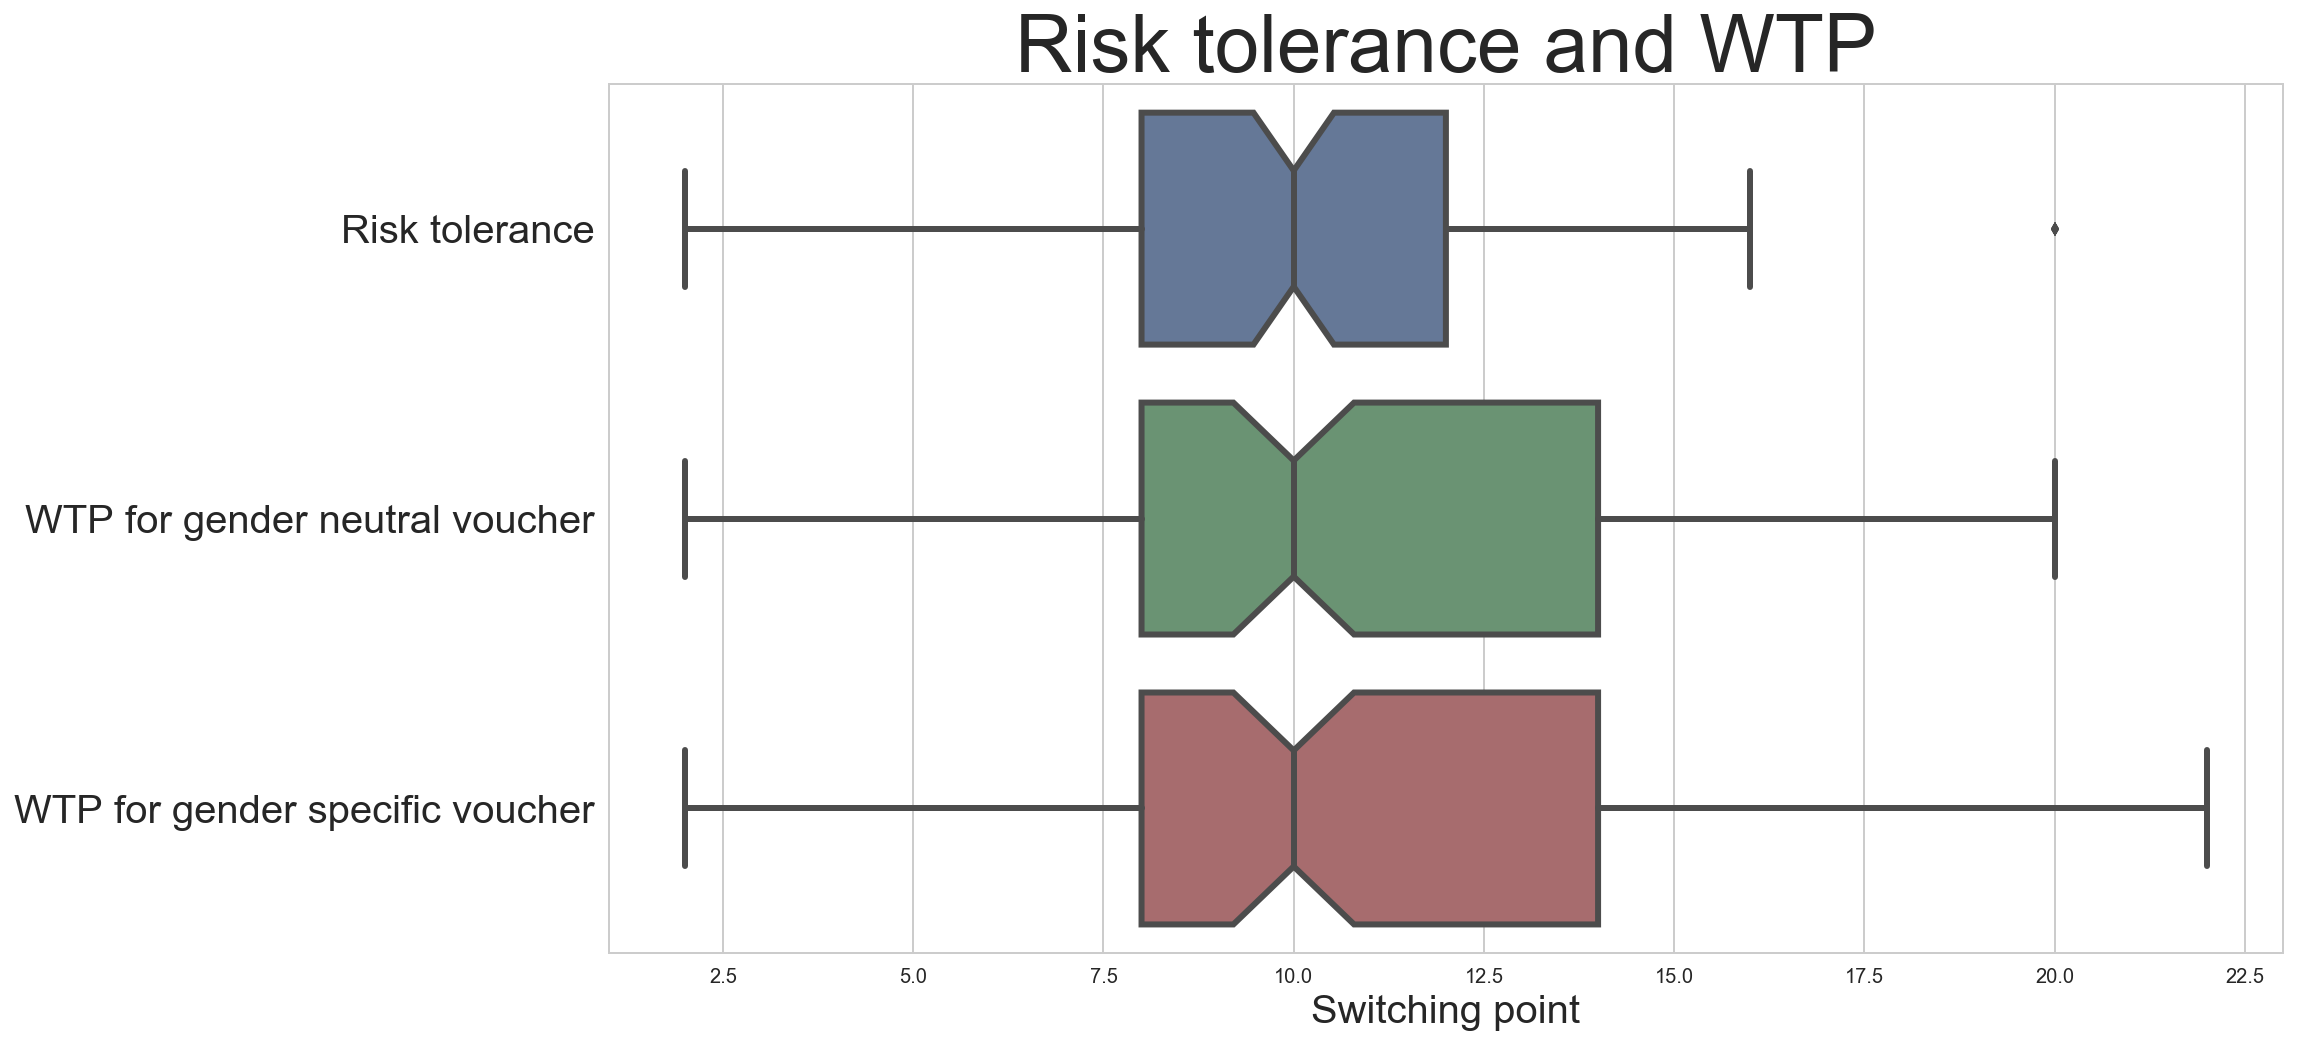

In [18]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.boxplot(data=[df1.risk_tolerance, df1.wtp_neutral, df1.wtp_specific], orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_title('Risk tolerance and WTP', fontsize=40)
ax.set_xlabel('Switching point', fontsize=20)
ax.set_yticklabels(['Risk tolerance', 'WTP for gender neutral voucher', 'WTP for gender specific voucher'], fontsize=20)

plt.show()

In [51]:
# NORMALIZING THE VARIABLES

income_own_norm = (df1.income_own - df1.income_own.mean()) / df1.income_own.std()


In [45]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})
    
    dist.axvline(np.mean(data), lw=1, c='red', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':1})

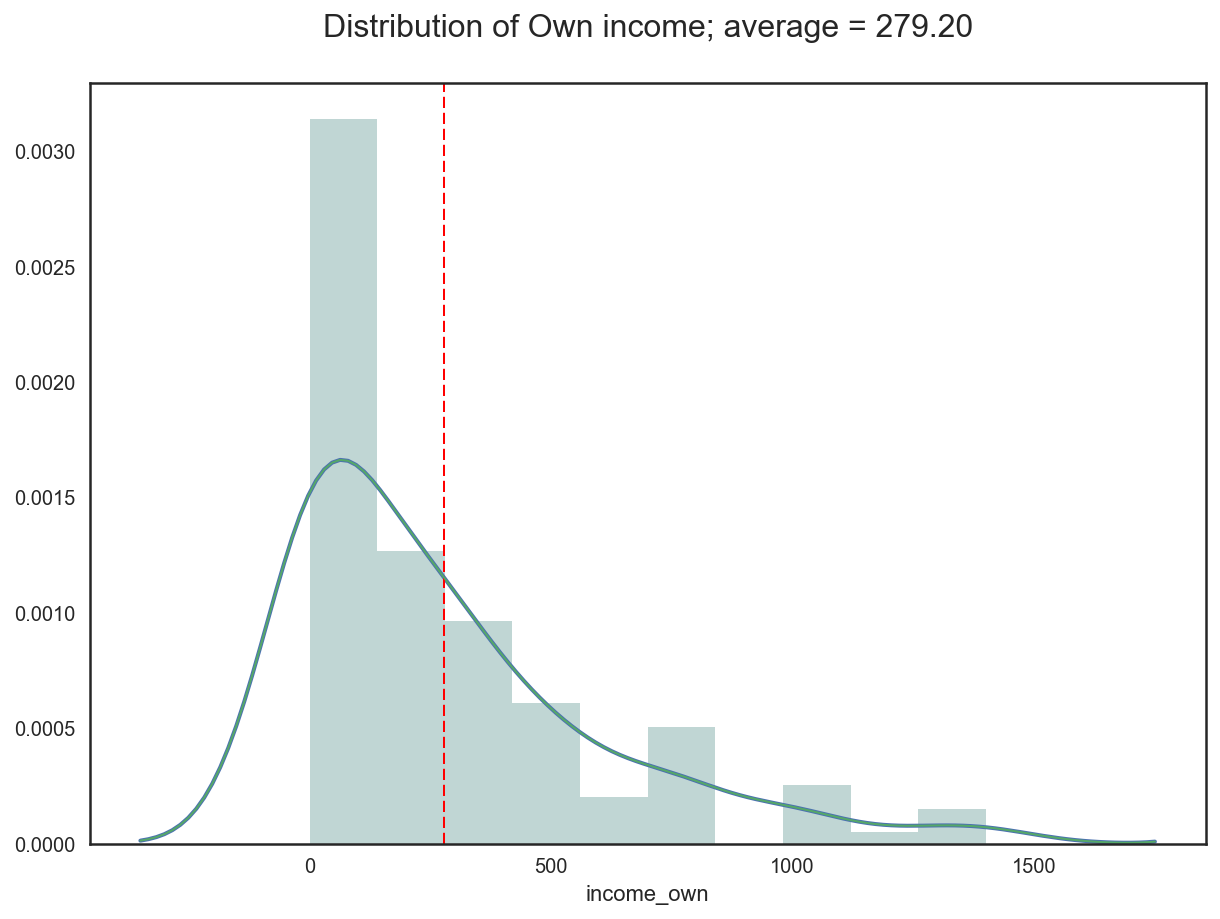

In [47]:
histogram_plotter("Own income", df1.income_own)

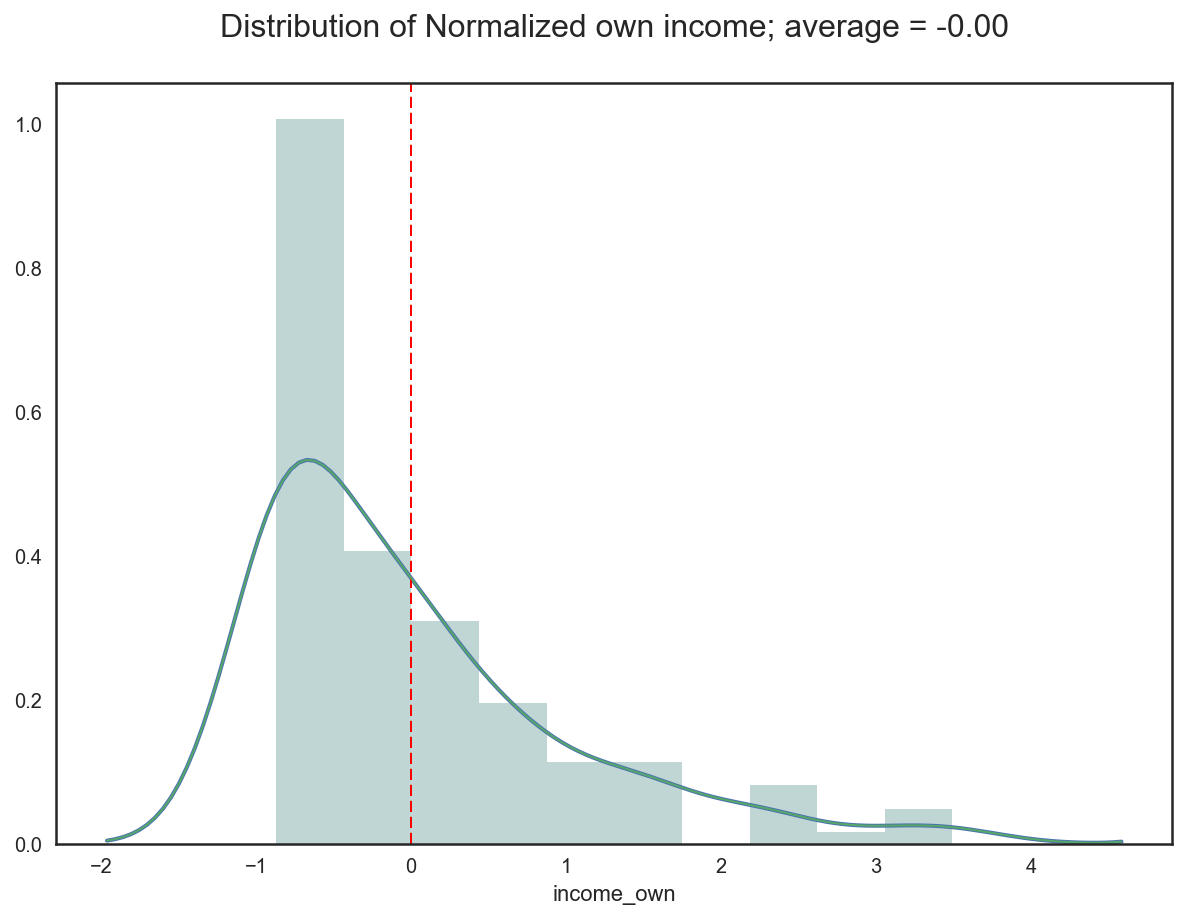

In [48]:
histogram_plotter("Normalized own income", income_own_norm)

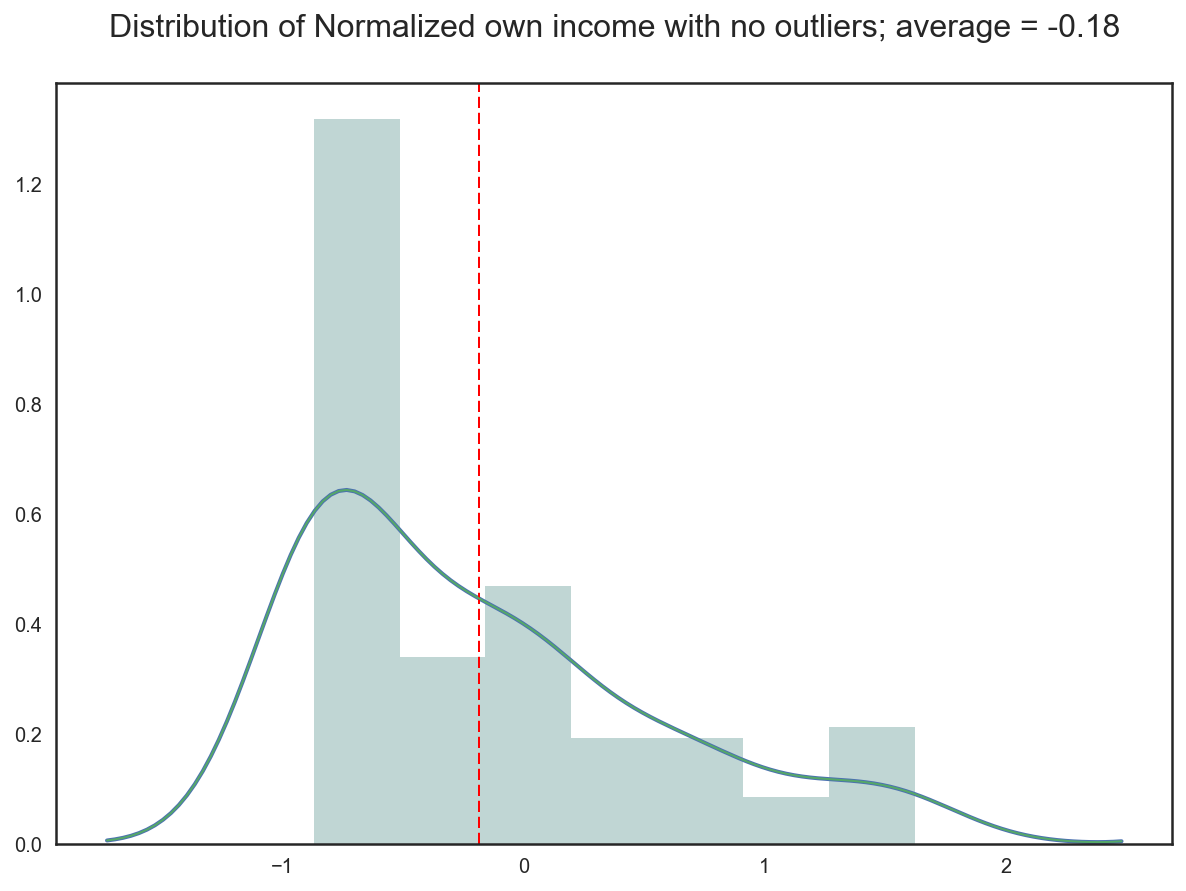

In [50]:
income_own_norm_clean= [x for x in income_own_norm if x < 2]

histogram_plotter("Normalized own income with no outliers", income_own_norm_clean)


The problem with own income variable is that it is censored at zero. Since most of the subjects are students, they are unemployed and they report zero income. That is why I exculded zero values to check the distribution of those who are employed (I explored own incomes between. Normalization doesn't help a lot here. Problem is censoring at zero plus outliers. Even without zero values and with no outliers, this distribution looks weird which is not surprising because we are talking about student's income.

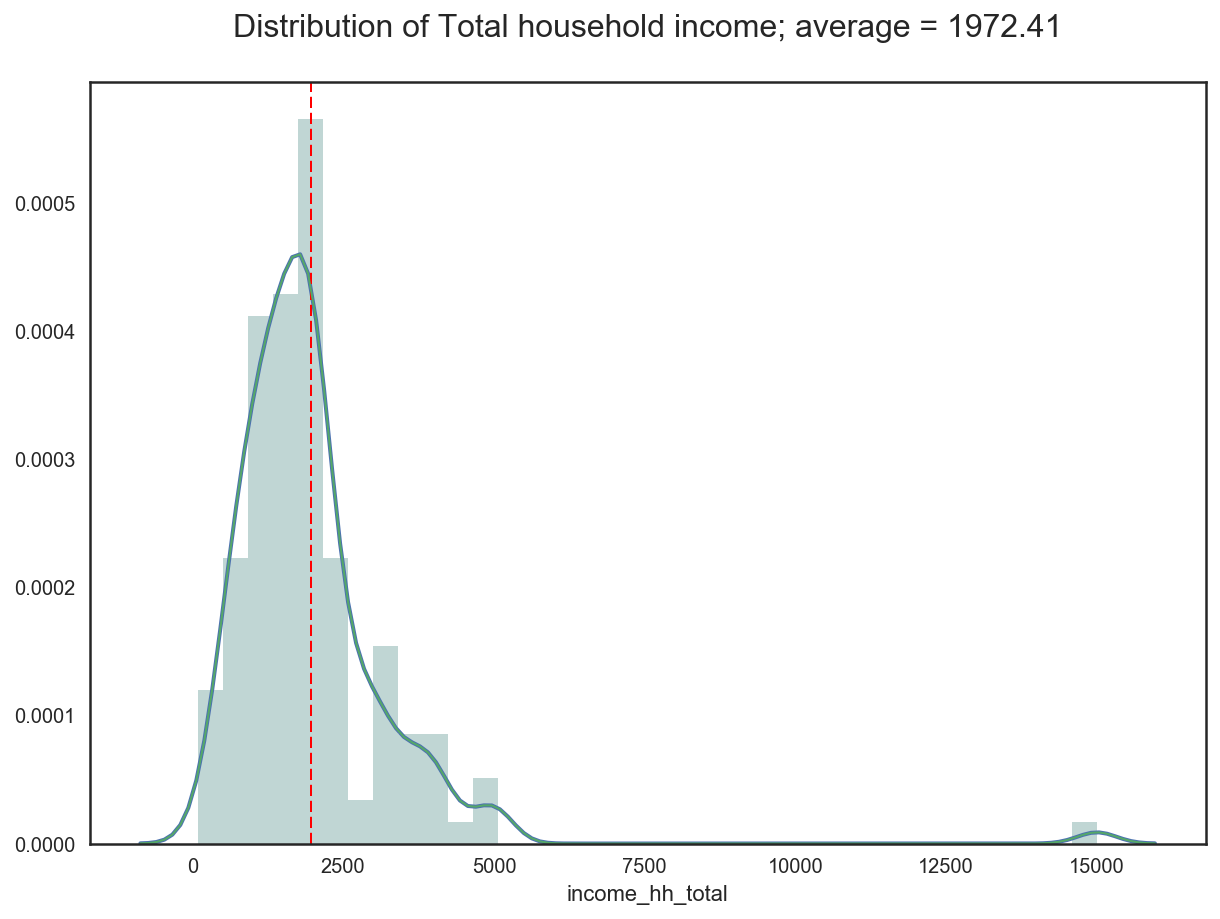

In [53]:
histogram_plotter("Total household income", df1.income_hh_total)

We can see that we have a big outlier. This outlier might be a falsely reported income. For further analysis, we will drop this outlier. 

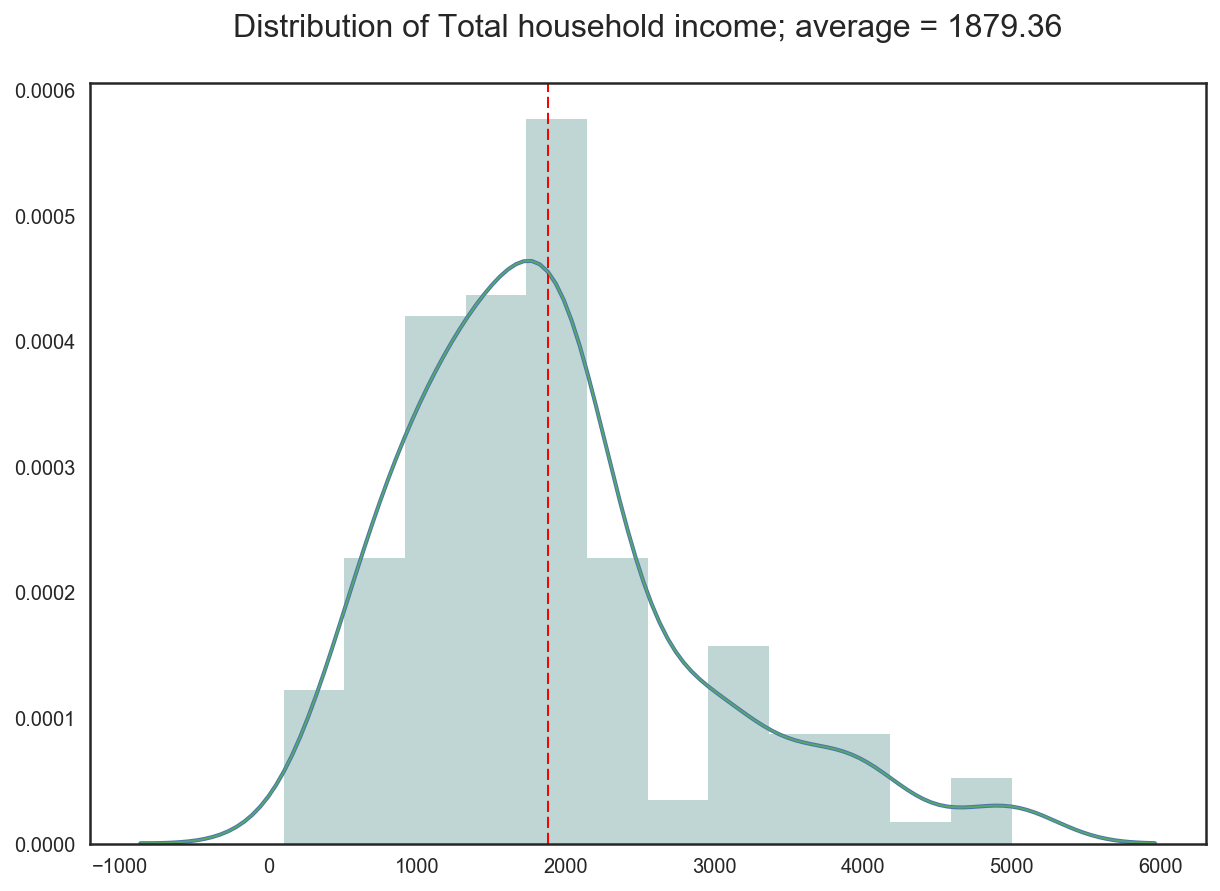

In [57]:
income_total_clean = [x for x in df1.income_hh_total if x < 6000]

histogram_plotter("Total household income", income_total_clean)

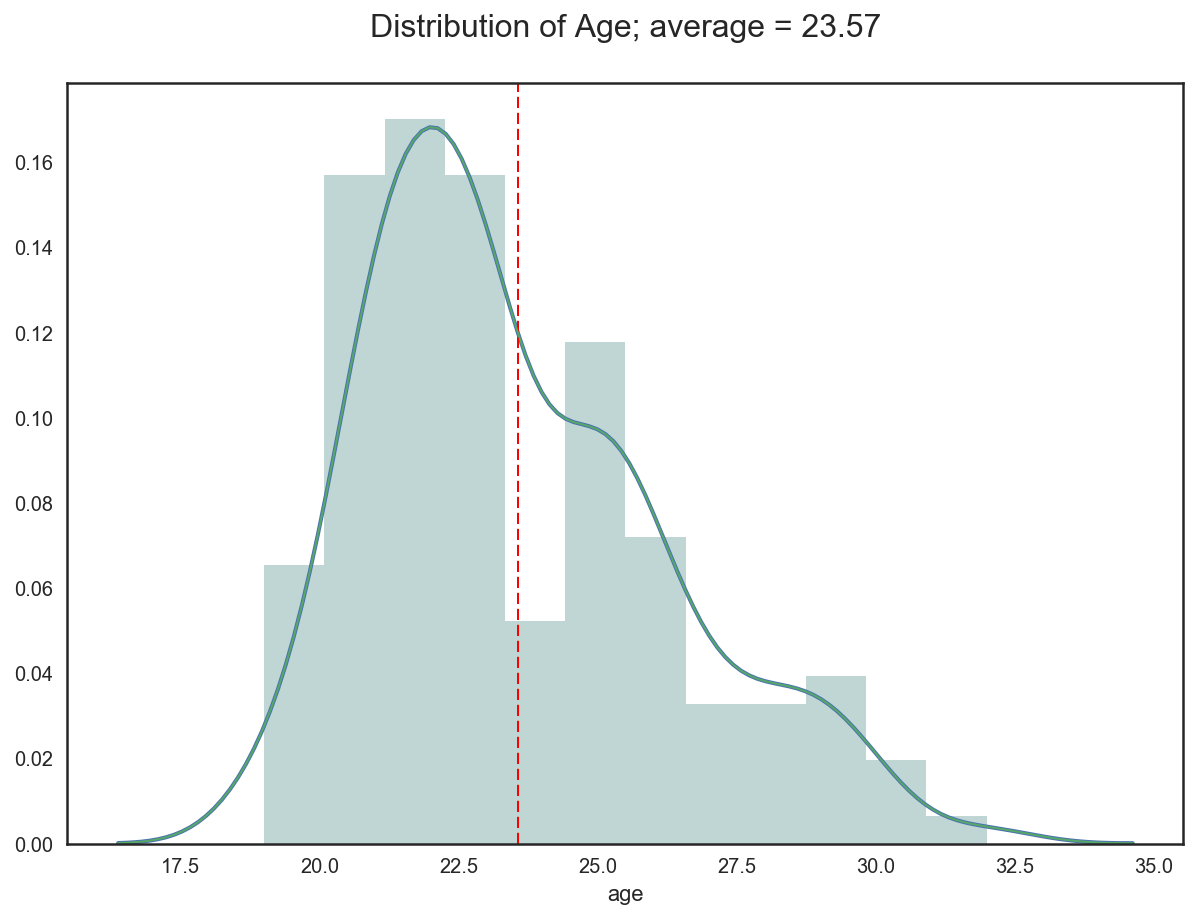

In [44]:
histogram_plotter("Age", df1.age)

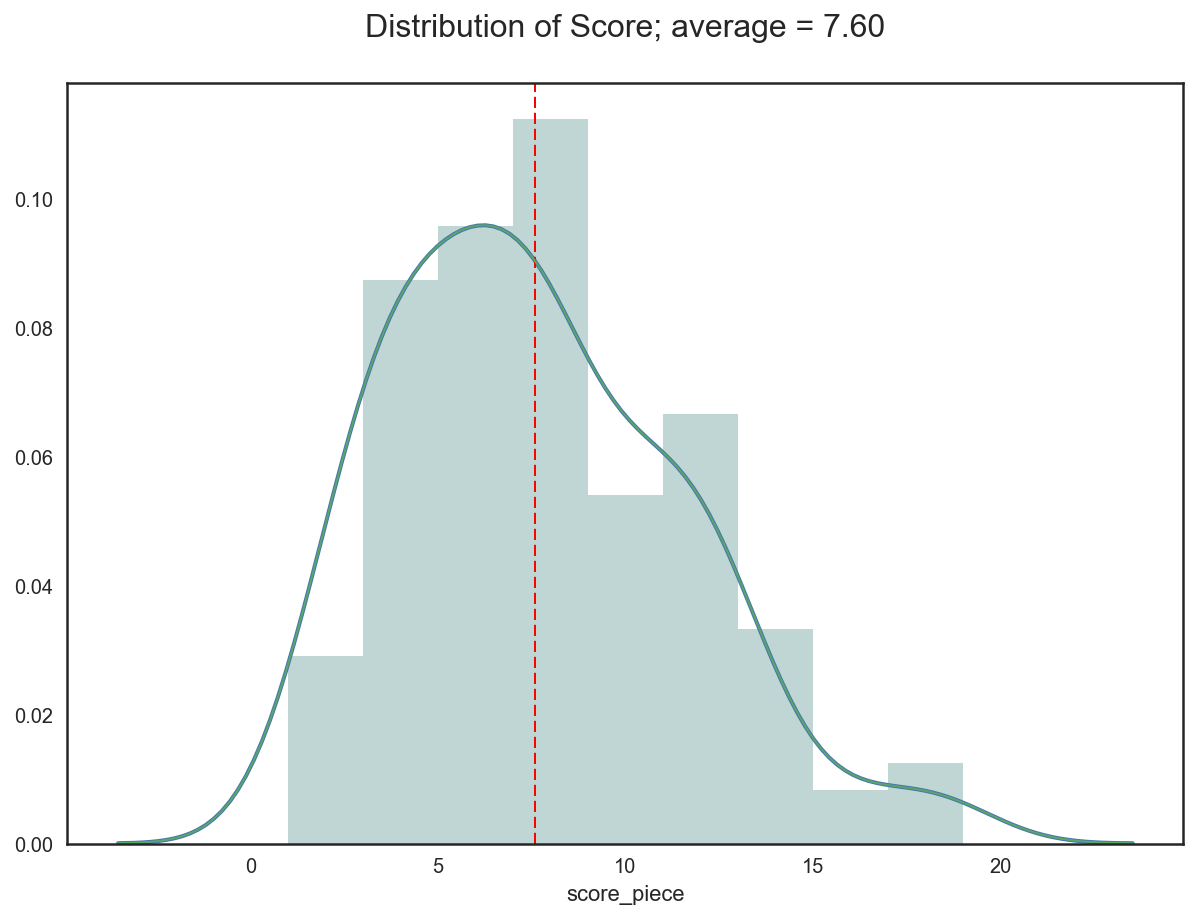

In [40]:
histogram_plotter("Score", df1.score_piece)

We can see that we have significant outliers in terms of score (performance). We have these outliers because of mistake in experimental protocol for first session so these observations should be dropped.

In [37]:
score_clean = df1.score_piece
score_clean.drop(score_clean.index[:21], inplace=True)

C:\Users\Boris\Anaconda2\lib\site-packages\pandas\core\generic.py:1930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


21     19
22      3
23     11
24      6
25      7
26     12
27      5
28     16
29      9
30      3
31     11
32      6
33     12
34     10
35     14
36      7
37      5
38      9
39      8
40     10
41      7
42     18
43     13
44      5
45      4
46      8
47      8
48      8
49      3
50      5
51      5
52     12
53      1
54      8
55      7
56      5
57      5
58     16
59     11
60      3
61     11
62      8
63      3
64      8
65      6
66     13
67     13
68      3
69     11
70     10
71     12
72      7
73      8
74     10
75     18
76      5
77      8
78      6
79      5
80      2
81      4
82      8
83      2
84      5
85      6
86      9
87      5
88      3
89     11
90      4
91      6
92      4
93     10
94      4
95      9
96     12
97      7
98      9
99      3
100    10
101     6
102     2
103     7
104     4
105     7
106     7
107     7
108     2
109    13
110    12
111    11
112     5
113     5
114     3
115     7
116     7
117    13
118    11
119     4
120     8


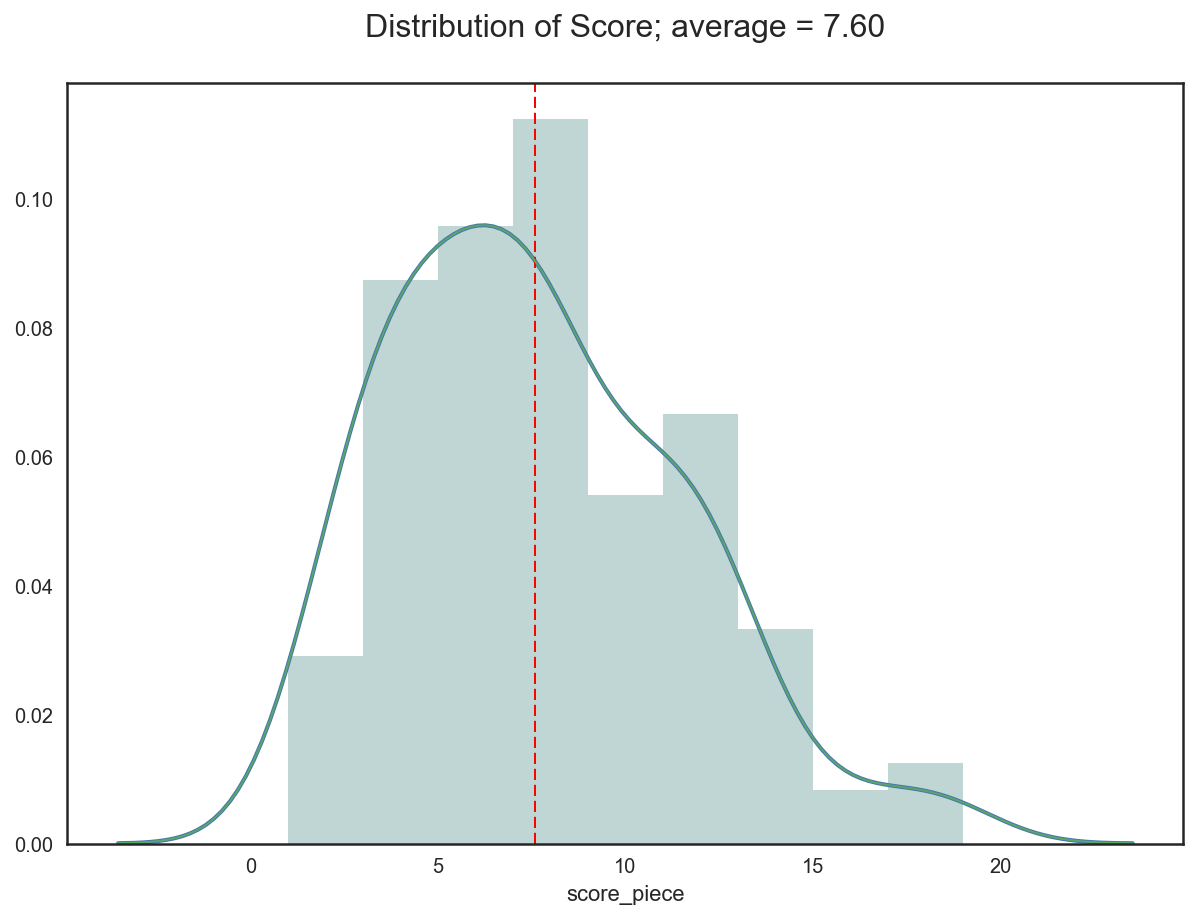

In [59]:
histogram_plotter("Score", score_clean)

Now distribution looks much closer to normal distribution.

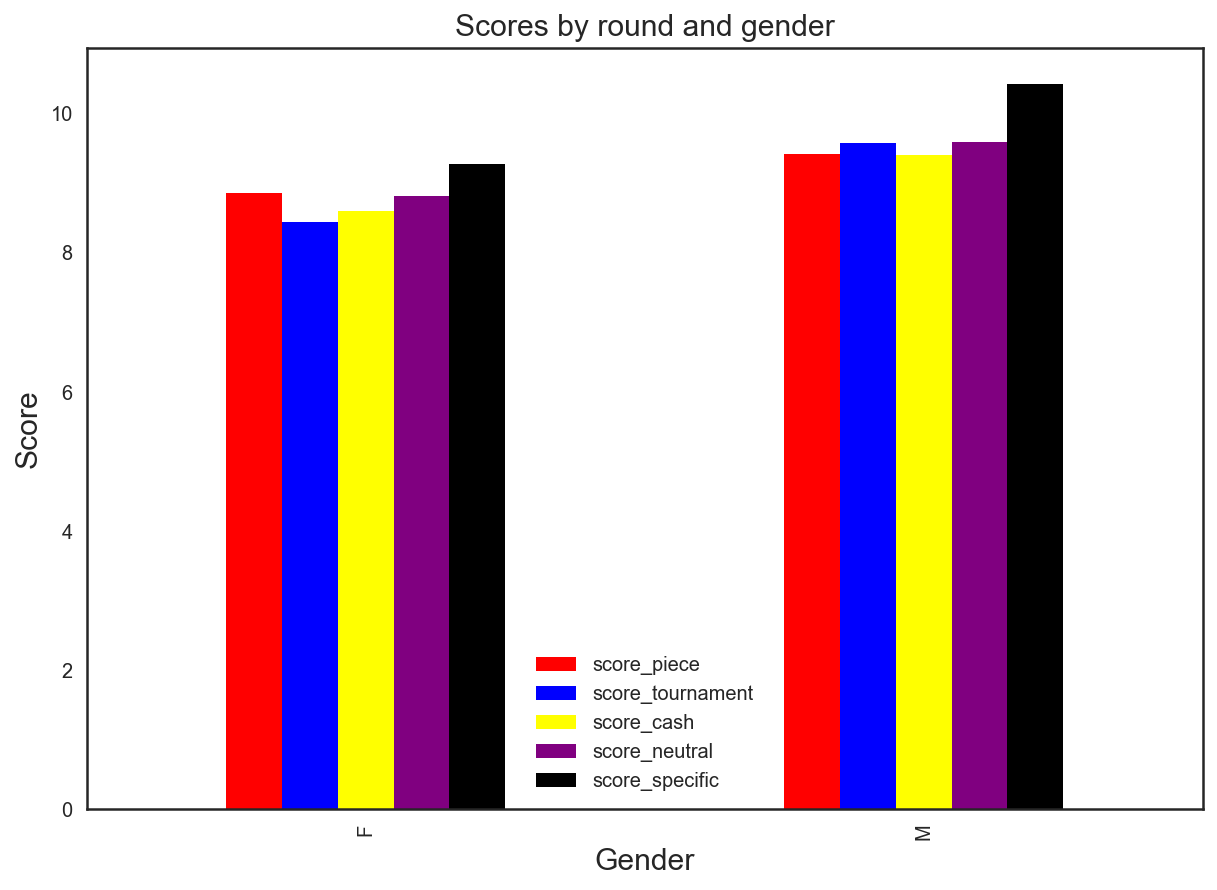

In [92]:
df1.groupby(['gender'])['score_piece','score_tournament', 'score_cash','score_neutral','score_specific'].mean().plot(kind="bar", color=["red","blue","yellow","purple","black"], width=0.5)
plt.title('Average scores by round and gender', fontsize = 15)
plt.ylabel('Average score', fontsize=15)
plt.xlabel('Gender', fontsize=15)

plt.show()

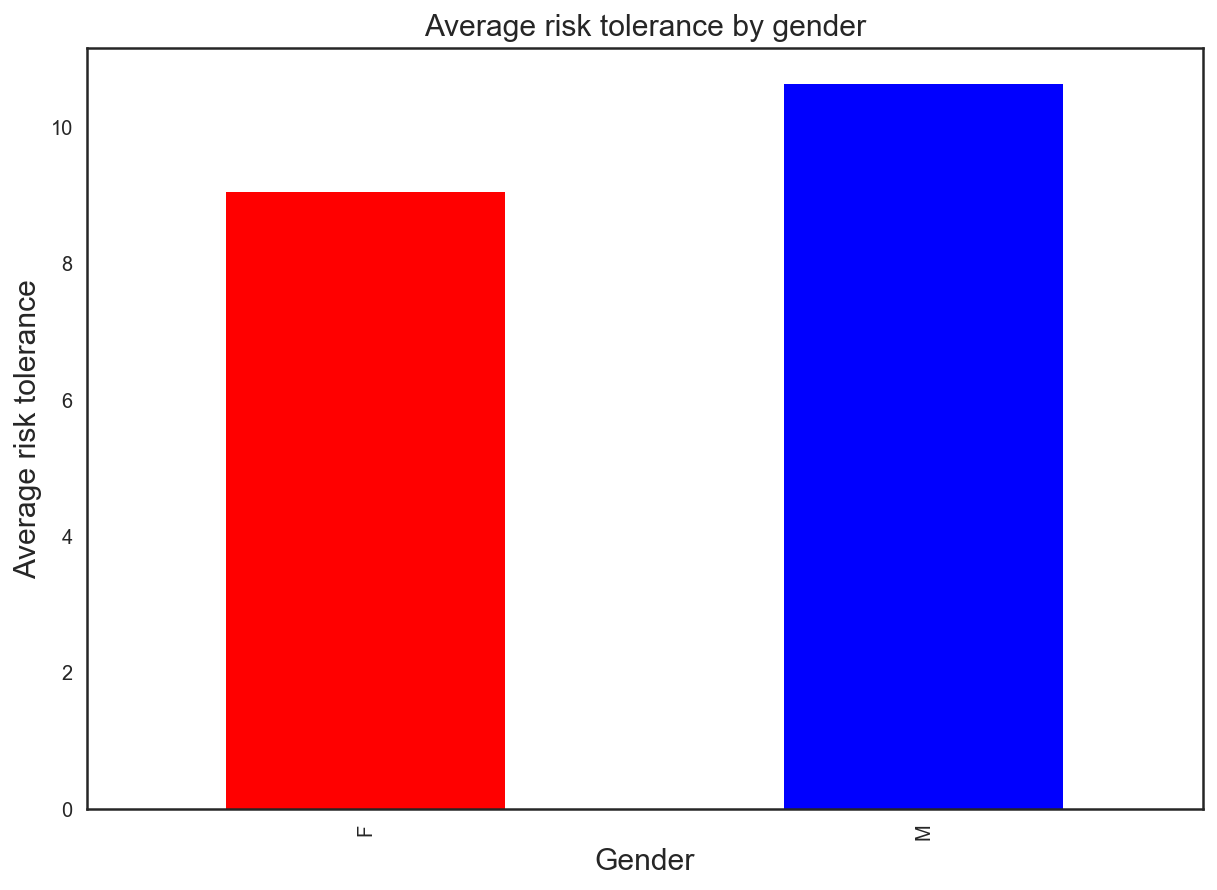

In [93]:
df1.groupby(['gender'])['risk_tolerance'].mean().plot(kind="bar", color=["red","blue"], width=0.5)
plt.title('Average risk tolerance by gender', fontsize = 15)
plt.ylabel('Average risk tolerance', fontsize=15)
plt.xlabel('Gender', fontsize=15)

plt.show()

In [88]:
df2 = df1[[
    'gender',
    'age',
    'height',
    'hh_members',
    'male_hh_members', 
    'female_hh_members', 
    'income_own', 
    'income_hh_head', 
    'income_hh_total', 
    'guess_opponent',
    'guess_male', 
    'guess_female',  
    'risk_gamble_1', 
    'risk_gamble_2', 
    'risk_gamble_3', 
    'risk_general', 
    'risk_driving', 
    'risk_finance', 
    'risk_sport', 
    'risk_career', 
    'risk_health',       
    'score_piece', 
    'score_tournament', 
    'score_cash', 
    'choice_cash',
    'score_neutral', 
    'choice_neutral', 
    'score_specific', 
    'choice_specific', 
    'guess', 
    'risk_tolerance',
    'wtp_neutral', 
    'wtp_specific', 
    'send_serb', 
    'send_bosniak', 
    'expect_serb', 
    'expect_bosniak'
        ]]

"""I WASN'T SURE HOW TO INCLUDE ONLY CERTAIN VARIABLES IN THE CORRELATION MATRIX (HEATMAP), SO I JUST MADE
A NEW DATAFRAME THAT CONTAINS ONLY THOSE VARIABLES AND I AM GOING TO USE THAT NEW DATAFRAME FOR CORRELATION HEATMAP"""

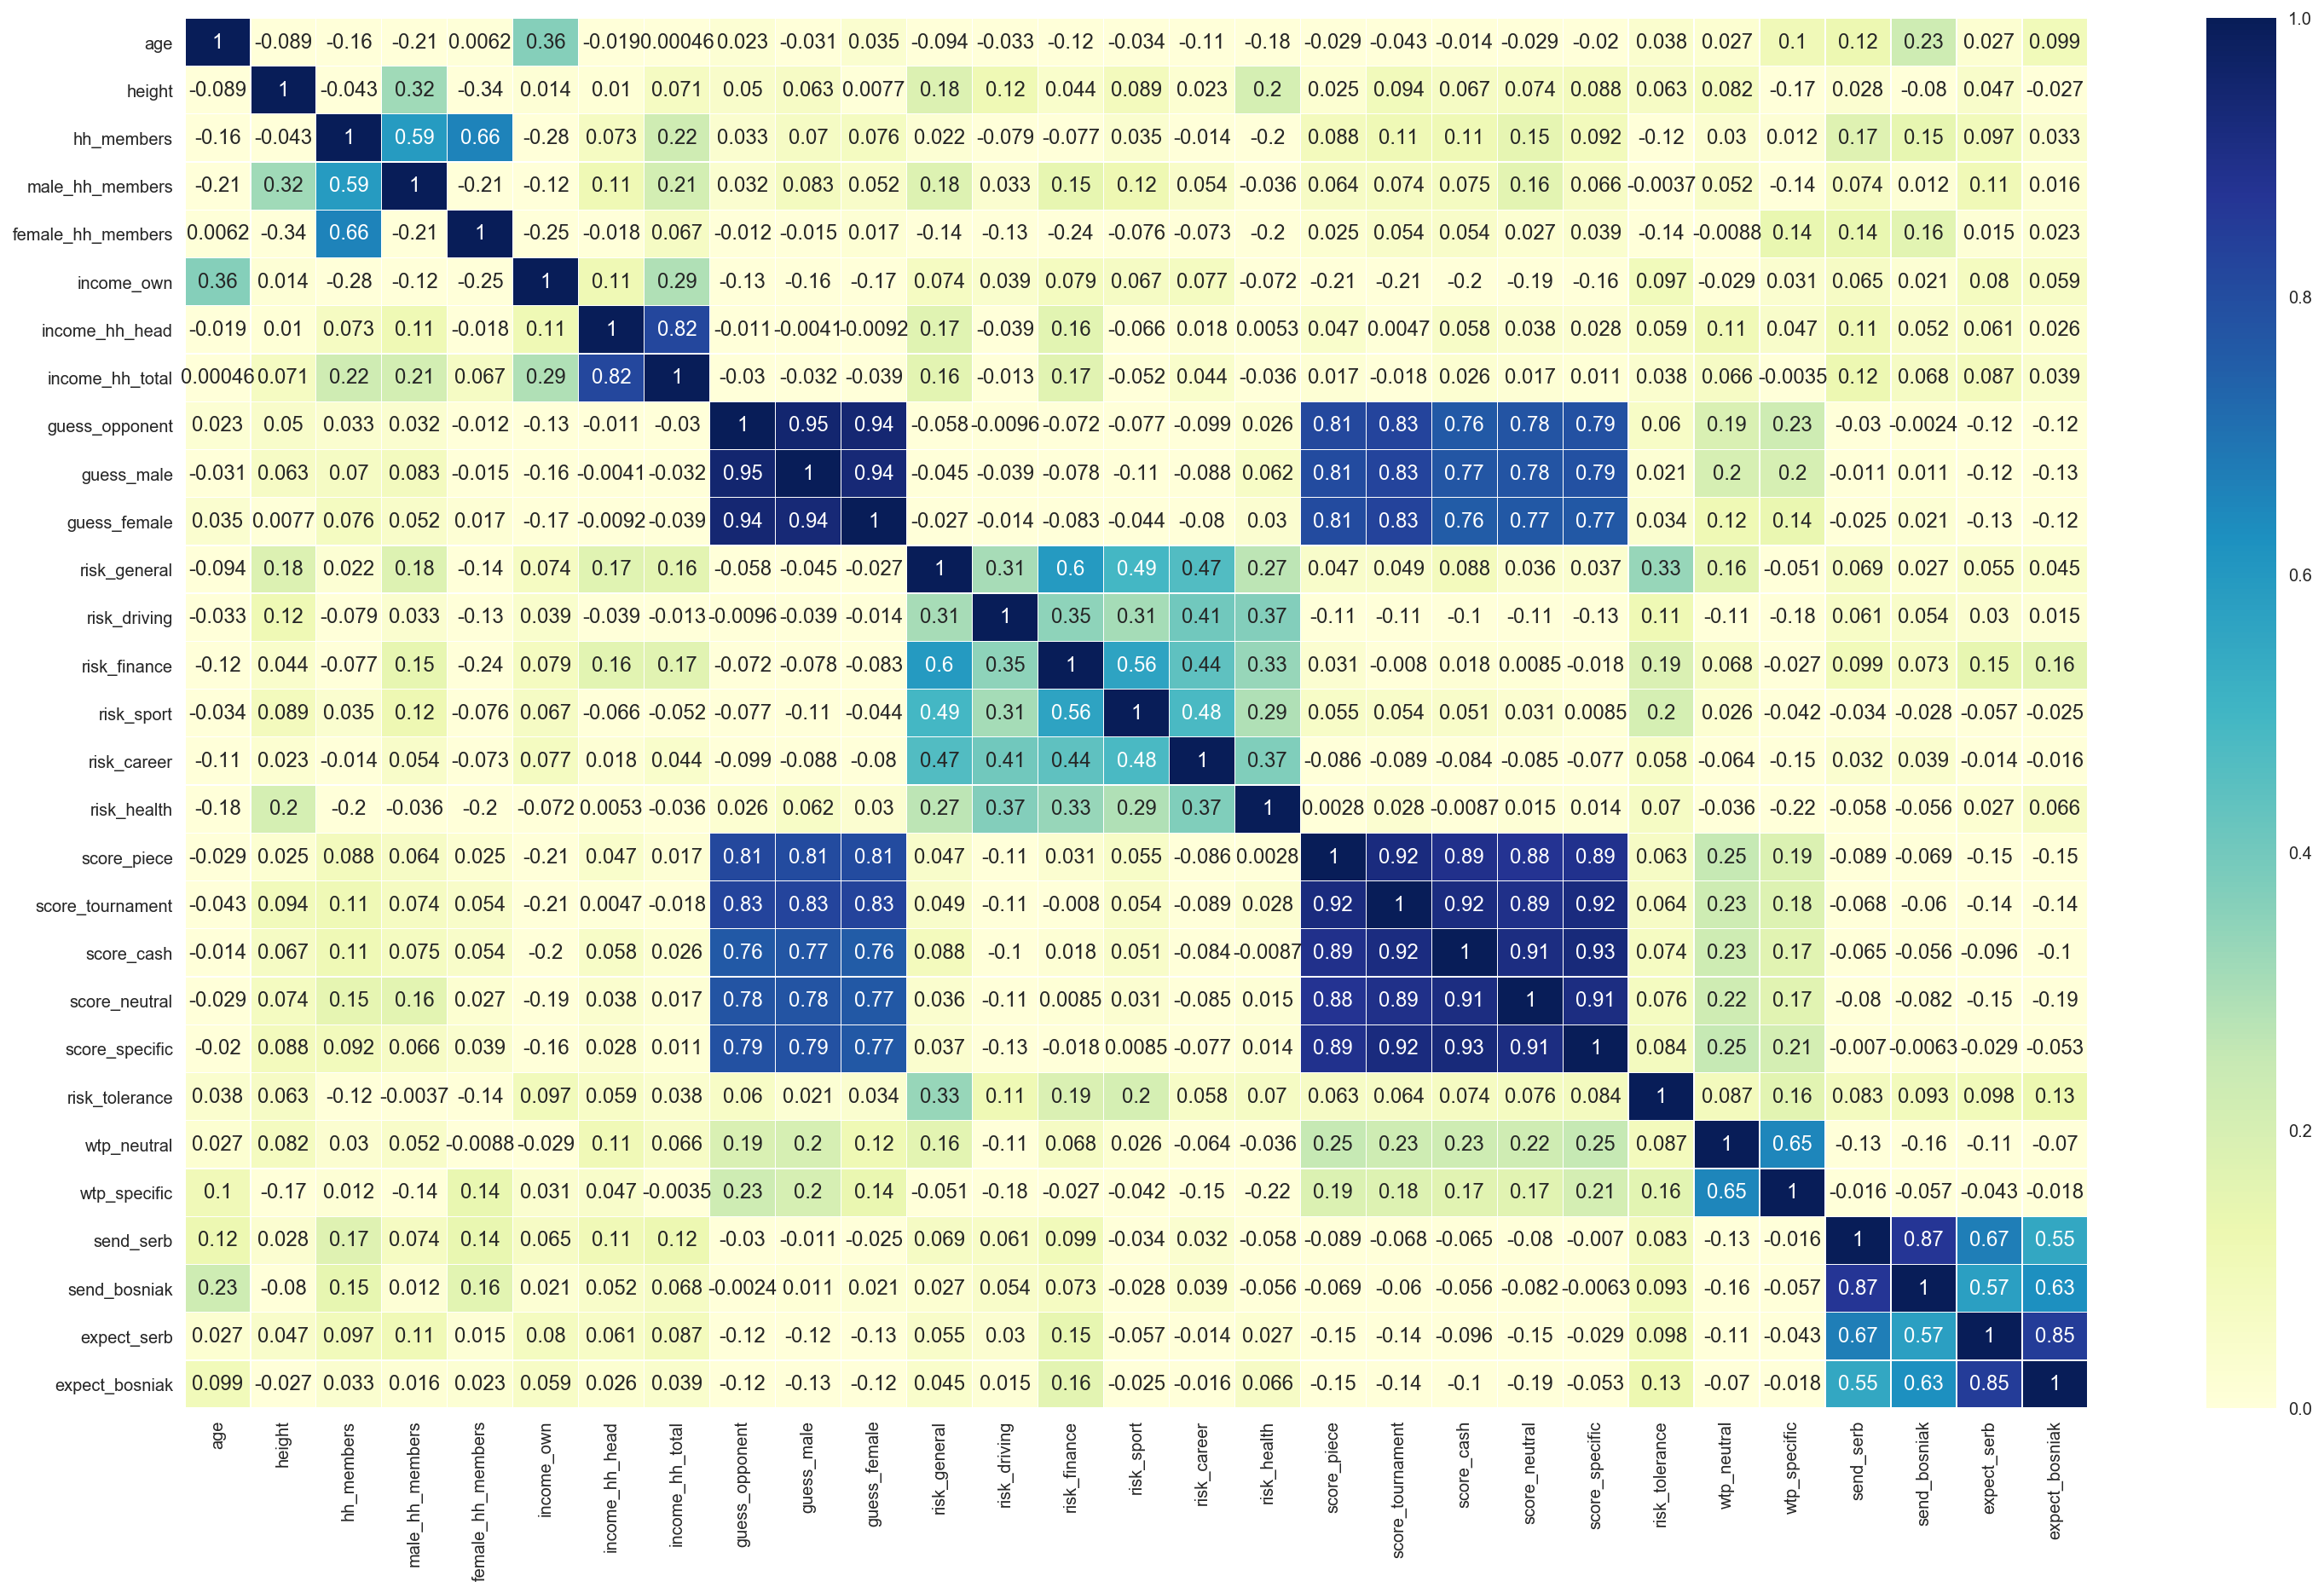

In [89]:
fig = plt.figure(figsize=(25,15))
ax = fig.gca()
sns.heatmap(df2.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

As we can see, there is a lot of variables that are highly correlated, but that is not surprising or concerning in this case. Highly correlated variables:

* scores in different rounds, which makes perfect sense because ones who perform well in first round will likely perform well in other rounds;

* guess of opponent's performance and own performance, which makes sense because we usually guess opponent's performance based on our own;

* amount sent to Serb and Bosniak and amounts expected from Serb and Bosniak - people who are more generous to Serbs are more generous to Bosniaks as well.
